In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Sourcing the data

In [3]:
bank_dataset = pd.read_csv('application_data.csv')
bank_dataset.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

Checking the structure of the data.

In [4]:
# Determining the shape of given dataset
bank_dataset.shape

(307511, 122)

In [5]:
bank_dataset.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

In [6]:
#to check the data type of each column
bank_dataset.dtypes

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
OWN_CAR_AGE                     float64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE                   int64


# Cleaning the data


Percentage of missing values in each column in sourced dataset.

In [7]:
round(100*(bank_dataset.isnull().sum() / len(bank_dataset.index)), 2)

SK_ID_CURR                       0.00
TARGET                           0.00
NAME_CONTRACT_TYPE               0.00
CODE_GENDER                      0.00
FLAG_OWN_CAR                     0.00
FLAG_OWN_REALTY                  0.00
CNT_CHILDREN                     0.00
AMT_INCOME_TOTAL                 0.00
AMT_CREDIT                       0.00
AMT_ANNUITY                      0.00
AMT_GOODS_PRICE                  0.09
NAME_TYPE_SUITE                  0.42
NAME_INCOME_TYPE                 0.00
NAME_EDUCATION_TYPE              0.00
NAME_FAMILY_STATUS               0.00
NAME_HOUSING_TYPE                0.00
REGION_POPULATION_RELATIVE       0.00
DAYS_BIRTH                       0.00
DAYS_EMPLOYED                    0.00
DAYS_REGISTRATION                0.00
DAYS_ID_PUBLISH                  0.00
OWN_CAR_AGE                     65.99
FLAG_MOBIL                       0.00
FLAG_EMP_PHONE                   0.00
FLAG_WORK_PHONE                  0.00
FLAG_CONT_MOBILE                 0.00
FLAG_PHONE  

In [8]:
#Looking for missing value percentage of each column
Bank_ds = bank_dataset.isnull().sum()
#displaying the null values of columns of more than 40%
Bank_ds = Bank_ds[Bank_ds.values>=(0.4*len(Bank_ds))]
len(Bank_ds)


64

As we can see there are 64 columns which have null values of atleast 40% 

In [9]:
#dropping all the columns which has missing value more than 40%
Bank_ds = bank_dataset.drop(bank_dataset.columns[bank_dataset.isnull().mean() >= 0.4], axis = 1)
Bank_ds.shape


(307511, 73)

In [10]:
print('before dropping null columns',bank_dataset.shape)
print('after dropping null columns',Bank_ds.shape)

before dropping null columns (307511, 122)
after dropping null columns (307511, 73)


In [11]:
#columns with less null perecentage after dropping columns of 40% null values
round(100*(Bank_ds.isnull().sum() / len(Bank_ds.index)), 2)

SK_ID_CURR                      0.00
TARGET                          0.00
NAME_CONTRACT_TYPE              0.00
CODE_GENDER                     0.00
FLAG_OWN_CAR                    0.00
FLAG_OWN_REALTY                 0.00
CNT_CHILDREN                    0.00
AMT_INCOME_TOTAL                0.00
AMT_CREDIT                      0.00
AMT_ANNUITY                     0.00
AMT_GOODS_PRICE                 0.09
NAME_TYPE_SUITE                 0.42
NAME_INCOME_TYPE                0.00
NAME_EDUCATION_TYPE             0.00
NAME_FAMILY_STATUS              0.00
NAME_HOUSING_TYPE               0.00
REGION_POPULATION_RELATIVE      0.00
DAYS_BIRTH                      0.00
DAYS_EMPLOYED                   0.00
DAYS_REGISTRATION               0.00
DAYS_ID_PUBLISH                 0.00
FLAG_MOBIL                      0.00
FLAG_EMP_PHONE                  0.00
FLAG_WORK_PHONE                 0.00
FLAG_CONT_MOBILE                0.00
FLAG_PHONE                      0.00
FLAG_EMAIL                      0.00
O

In [12]:
#as we can see there are few more columns we can get rid of to make our analysis easier.
erase = ['FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE','FLAG_PHONE','FLAG_EMAIL','FLAG_DOCUMENT_2','FLAG_DOCUMENT_3','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5',
        'FLAG_DOCUMENT_6','FLAG_DOCUMENT_7','FLAG_DOCUMENT_8','FLAG_DOCUMENT_9','FLAG_DOCUMENT_10','FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13','FLAG_DOCUMENT_14','FLAG_DOCUMENT_15','FLAG_DOCUMENT_16',
        'FLAG_DOCUMENT_17','FLAG_DOCUMENT_18','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21','NAME_TYPE_SUITE','OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE']
# 'erase' consists the columns that needs to be dropped.
Bank_ds=Bank_ds.drop(erase,axis = 1)
Bank_ds.shape

(307511, 43)


### There are particular columns with values "XNA". if the number is high we can drop them or if the number is low we can impute it accordingly.

In [13]:
# Describing the Gender column to check the number of females and males

Bank_ds['CODE_GENDER'].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

We can see Gender column having values "XNA", Which are not required.

# lets put rows having "XNA" values to male as it wont create difference as there are huge difference between ratio of male and female

In [14]:
# Updating the column 'CODE_GENDER' with "M" for the dataset

Bank_ds.loc[Bank_ds['CODE_GENDER']=='XNA','CODE_GENDER']='M'
Bank_ds['CODE_GENDER'].value_counts()

F    202448
M    105063
Name: CODE_GENDER, dtype: int64

#### Lets see if ORGANISATION_TYPE have "XNA" values

In [15]:
Bank_ds['ORGANIZATION_TYPE'].value_counts()

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

In [16]:
# there are total of 55374 rows with "xna" values.
#Dropping these values wont make much difference to the dataset.
Bank_ds=Bank_ds.drop(Bank_ds.loc[Bank_ds['ORGANIZATION_TYPE']=='XNA'].index)
Bank_ds[Bank_ds['ORGANIZATION_TYPE']=='XNA'].shape

(0, 43)

In [17]:
Bank_ds.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON

There are rows where the values from multiple columns related to Credit Bureau information is null.

In [18]:
#Removing such rows.
col = ['AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']
Bank_ds = Bank_ds.dropna(axis=0, subset= col)

In [19]:
Bank_ds.shape

(218281, 43)

DAYS_BIRTH values wont give us desired results for analysing the dataset.We need to convert DAYS_BIRTH to the "Years" to make our study easier.

In [20]:
#TO convert DAYS_BIRTH to year
Bank_ds['DAYS_BIRTH'] = abs(Bank_ds['DAYS_BIRTH'] // 365)

In [21]:
Bank_ds.shape

(218281, 43)

# Outliers

In [22]:
# checking the distribution of a subset of continuous variables
round(Bank_ds[['AMT_GOODS_PRICE', 'EXT_SOURCE_2','EXT_SOURCE_3','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY']].describe(), 6)

,AMT_GOODS_PRICE,EXT_SOURCE_2,EXT_SOURCE_3,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY
count,2.180640e+05,217887.000000,202241.000000,2.182810e+05,2.182810e+05,218270.000000
mean,5.572237e+05,0.519776,0.500341,1.785034e+05,6.199429e+05,27897.586716
std,3.758178e+05,0.188277,0.196006,2.712983e+05,4.093904e+05,14544.641893
min,4.050000e+04,0.000001,0.000527,2.655000e+04,4.500000e+04,1980.000000
25%,2.475000e+05,0.405677,0.357293,1.125000e+05,2.844000e+05,17167.500000
50%,4.500000e+05,0.570629,0.522697,1.575000e+05,5.264910e+05,25969.500000
75%,7.020000e+05,0.665448,0.657784,2.250000e+05,8.353800e+05,35689.500000
max,4.050000e+06,0.855000,0.893976,1.170000e+08,4.050000e+06,258025.500000


from above we can say that since EXT_SOURCE_2, and EXT_SOURCE_3 have gradual growth percentile value, so we can impute the missing values with their mean value.

In [23]:
#For EXT_SOURCE_2
Bank_ds.loc[np.isnan(Bank_ds['EXT_SOURCE_2']), ['EXT_SOURCE_2']] =Bank_ds['EXT_SOURCE_2'].mean()

In [24]:
#For EXT_SOURCE_3
Bank_ds.loc[np.isnan(Bank_ds['EXT_SOURCE_3']), ['EXT_SOURCE_3']] = Bank_ds['EXT_SOURCE_2'].mean()

studyting other remaining columns and possibility of outliers of 'AMT_GOODS_PRICE','AMT_CREDIT','AMT_ANNUITY'.


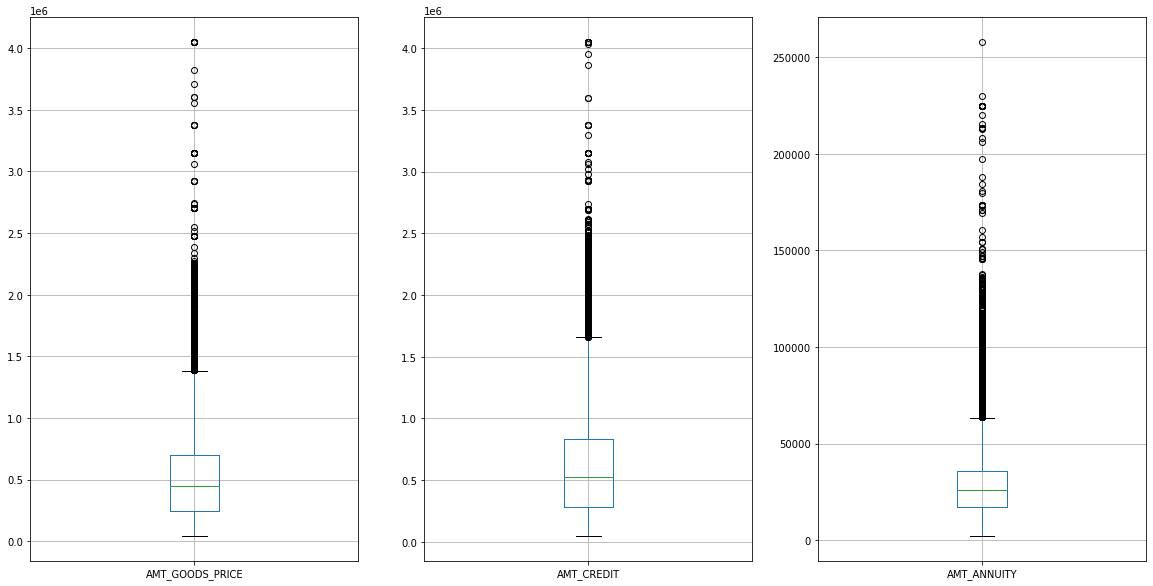

In [25]:
out_cal = ['AMT_GOODS_PRICE','AMT_CREDIT','AMT_ANNUITY']
plt.figure(figsize=(20,10))
for i, col in enumerate(out_cal):
    plt.subplot(1,3, i+1)
    Bank_ds.boxplot(column = col)
plt.show()

As we can see massive outliers in AMT_GOODS_PRICE,AMT_CREDIT,AMT_ANNUITY. So we ll remove the outliers in next step.


In [26]:
cols = out_cal

Q1 = Bank_ds[cols].quantile(0.25)
Q3 = Bank_ds[cols].quantile(0.75)
IQR = Q3 - Q1

Bank_ds = Bank_ds[~((Bank_ds[cols] < (Q1 - 1.5 * IQR)) |(Bank_ds[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [27]:
# Changing required columns variable type to numeric.
col_num=['TARGET','CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','REGION_POPULATION_RELATIVE','DAYS_BIRTH',
        'DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','HOUR_APPR_PROCESS_START','LIVE_REGION_NOT_WORK_REGION',
        'REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY']
Bank_ds[col_num]=Bank_ds[col_num].apply(pd.to_numeric)

In [28]:
Bank_ds.shape

(209056, 43)

#  Binning the numerical columns

Lets Create Bins for continous variable categories columns  'AMT_INCOME_TOTAL' and 'AMT_CREDIT'

In [29]:
Bank_ds['AMT_INCOME_TOTAL'].describe()

count    2.090560e+05
mean     1.728829e+05
std      2.722809e+05
min      2.655000e+04
25%      1.125000e+05
50%      1.575000e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

In [30]:
#bins for Income Of applicant.
Bin_1 =[0,25000,50000,75000,100000,125000,150000,175000,200000,225000,250000,275000,300000,325000,350000,375000,400000,425000,450000,475000,500000,10000000000]
slot_1 =['0-25000', '25000-50000','50000-75000','75000,100000','100000-125000', '125000-150000', '150000-175000','175000-200000',
       '200000-225000','225000-250000','250000-275000','275000-300000','300000-325000','325000-350000','350000-375000',
       '375000-400000','400000-425000','425000-450000','450000-475000','475000-500000','500000 +']
Bank_ds['AMT_INCOME_RANGE']=pd.cut(Bank_ds['AMT_INCOME_TOTAL'],Bin_1,labels=slot_1)

In [31]:
#Bins for Age of applicant
age = [0,10,20,30,40,50,60,70,100]
slot_2 = ['0-10','10-20','20-30','30-40','40-50','50-60','60-70','70+']
Bank_ds['AGE_CATEGORY']=pd.cut(Bank_ds['DAYS_BIRTH'],age,labels=slot_2)

In [32]:
# bins for Credit amount
bins = [0,150000,200000,250000,300000,350000,400000,450000,500000,550000,600000,650000,700000,750000,800000,850000,900000,1000000000]
slot_3 = ['0-150000', '150000-200000','200000-250000', '250000-300000', '300000-350000', '350000-400000','400000-450000',
        '450000-500000','500000-550000','550000-600000','600000-650000','650000-700000','700000-750000','750000-800000',
        '800000-850000','850000-900000','900000 and above']
Bank_ds['AMT_CREDIT_RANGE']=pd.cut(Bank_ds['AMT_CREDIT'],bins=bins,labels=slot_3)

# Imbalance percentage of Target variable

In [33]:
Bank_ds['TARGET'].value_counts(normalize = True)*100

0    91.514714
1     8.485286
Name: TARGET, dtype: float64

Lets plot a bar graph for easyier representation.

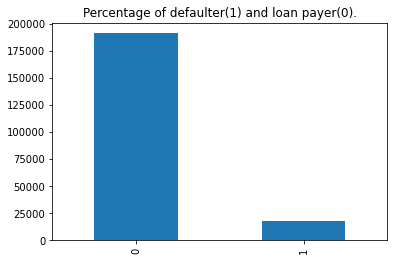

In [34]:
Bank_ds['TARGET'].value_counts().plot.bar()
plt.title('Percentage of defaulter(1) and loan payer(0).')
plt.show()

#### Splitting the given dataset application_data.csv into two dataset of Defaulter(targer1) and loan payers(targer 0)


In [35]:
target0_ds=Bank_ds.loc[Bank_ds["TARGET"]==0]
target1_ds=Bank_ds.loc[Bank_ds["TARGET"]==1]

In [36]:
# Calculating Imbalance percentage
round(len(target0_ds)/len(target1_ds),2)

10.79

The approximate ratio of target imbalance is 10.73%

# Exploratory Data Analysis

Univarient analysis for categories.

Lets create dataframe with target 0 and target 1.

In [37]:
bank_ds_def = Bank_ds.loc[Bank_ds['TARGET']==1]
print('\nBank dataset consisting Information of defaulters:\n','Shape of non defaulters :', bank_ds_def.shape)
bank_ds_def.head()




Bank dataset consisting Information of defaulters:
 Shape of non defaulters : (17739, 46)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_INCOME_RANGE,AGE_CATEGORY,AMT_CREDIT_RANGE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,26,-637,-3648.0,-2120,1,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0,200000-225000,20-30,400000-450000
26,100031,1,Cash loans,F,N,Y,0,112500.0,979992.0,27076.5,702000.0,Working,Secondary / secondary special,Widow,House / apartment,0.018029,52,-2628,-6573.0,-1827,1,Cooking staff,1.0,3,2,MONDAY,9,0,0,0,0,0,0,Business Entity Type 3,0.548477,0.190706,-161.0,0.0,0.0,0.0,0.0,2.0,2.0,100000-125000,50-60,900000 and above
40,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,855000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,0.025164,48,-1262,-1182.0,-1029,1,Laborers,2.0,2,2,TUESDAY,9,0,0,0,0,0,0,Business Entity Type 3,0.306841,0.320163,-1075.0,0.0,0.0,0.0,2.0,0.0,4.0,200000-225000,40-50,900000 and above
42,100049,1,Cash loans,F,N,N,0,135000.0,288873.0,16258.5,238500.0,Working,Secondary / secondary special,Civil marriage,House / apartment,0.007305,37,-3597,-45.0,-4409,1,Sales staff,2.0,3,3,THURSDAY,11,0,0,0,0,0,0,Self-employed,0.674203,0.399676,-1480.0,0.0,0.0,0.0,0.0,0.0,2.0,125000-150000,30-40,250000-300000
110,100130,1,Cash loans,F,N,Y,1,157500.0,723996.0,30802.5,585000.0,Commercial associate,Incomplete higher,Separated,House / apartment,0.007274,29,-267,-387.0,-3190,1,Sales staff,2.0,2,2,SUNDAY,12,0,1,1,0,1,1,Trade: type 2,0.282069,0.120641,-56.0,0.0,0.0,0.0,0.0,0.0,0.0,150000-175000,20-30,700000-750000


In [38]:
bank_ds_non_def = Bank_ds.loc[Bank_ds['TARGET']==0]
print('\nBank dataset consisting Information of genuine loan payers:\n','Shape of non defaulters :',bank_ds_non_def.shape)
bank_ds_non_def.head()



Bank dataset consisting Information of genuine loan payers:
 Shape of non defaulters : (191317, 46)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_INCOME_RANGE,AGE_CATEGORY,AMT_CREDIT_RANGE
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,0.003541,46,-1188,-1186.0,-291,1,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.519776,-828.0,0.0,0.0,0.0,0.0,0.0,0.0,250000-275000,40-50,900000 and above
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,53,-225,-4260.0,-2531,1,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,-815.0,0.0,0.0,0.0,0.0,0.0,0.0,50000-75000,50-60,0-150000
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,55,-3038,-4311.0,-3458,1,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,0.519776,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0,100000-125000,50-60,500000-550000
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,454500.0,State servant,Secondary / secondary special,Married,House / apartment,0.035792,47,-1588,-4970.0,-477,1,Laborers,2.0,2,2,WEDNESDAY,16,0,0,0,0,0,0,Other,0.354225,0.621226,-2536.0,0.0,0.0,0.0,0.0,1.0,1.0,"75000,100000",40-50,450000-500000
10,100014,0,Cash loans,F,N,Y,1,112500.0,652500.0,21177.0,652500.0,Working,Higher education,Married,House / apartment,0.022800,28,-679,-4427.0,-738,1,Core staff,3.0,2,2,SATURDAY,15,0,0,0,0,0,0,Medicine,0.651862,0.363945,-844.0,0.0,0.0,0.0,1.0,0.0,0.0,100000-125000,20-30,650000-700000


# Gender based

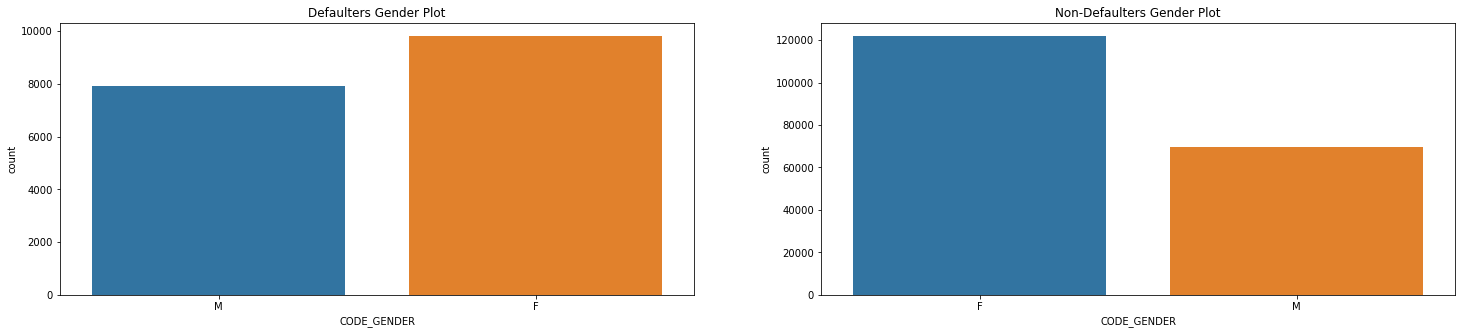

In [39]:
# plotting based on 'CODE_GENDER' counts
plt.figure(figsize = (25,5))
plt.subplot(1,2,1)
sns.countplot(x = 'CODE_GENDER', data = bank_ds_def)
plt.title('Defaulters Gender Plot')
plt.subplot(1,2,2)
sns.countplot(x = 'CODE_GENDER', data = bank_ds_non_def)
plt.title('Non-Defaulters Gender Plot')
plt.show()

From the above presentation we can see that:
1.Female are more likely to default compared to Male.
2.Female are more likely to pay Loan than Male.
3.Therefore we conclude that female are more likely to repay loans and default at the same time.

#  Income Range

In [40]:
def plotfunc(df,col,title,hue = None):
    
    sns.set_style('darkgrid')
    sns.set_context('poster')
    plt.rcParams["axes.labelsize"] = 15
    plt.rcParams['axes.titlesize'] = 18
    plt.rcParams['axes.titlepad'] = 10
    
    temp = pd.Series(data = hue)
    fig, x1 = plt.subplots()
    width = len(df[col].unique()) + 5 + 4*len(temp.unique())
    fig.set_size_inches(width , 8)
    plt.yscale('log')
    plt.title(title,fontsize=14)
    x1 = sns.countplot(data=df, x=col, hue=hue, palette='dark') 
    plt.setp(x1.get_xticklabels(), rotation=90, ha="right", rotation_mode="anchor")

    plt.show()

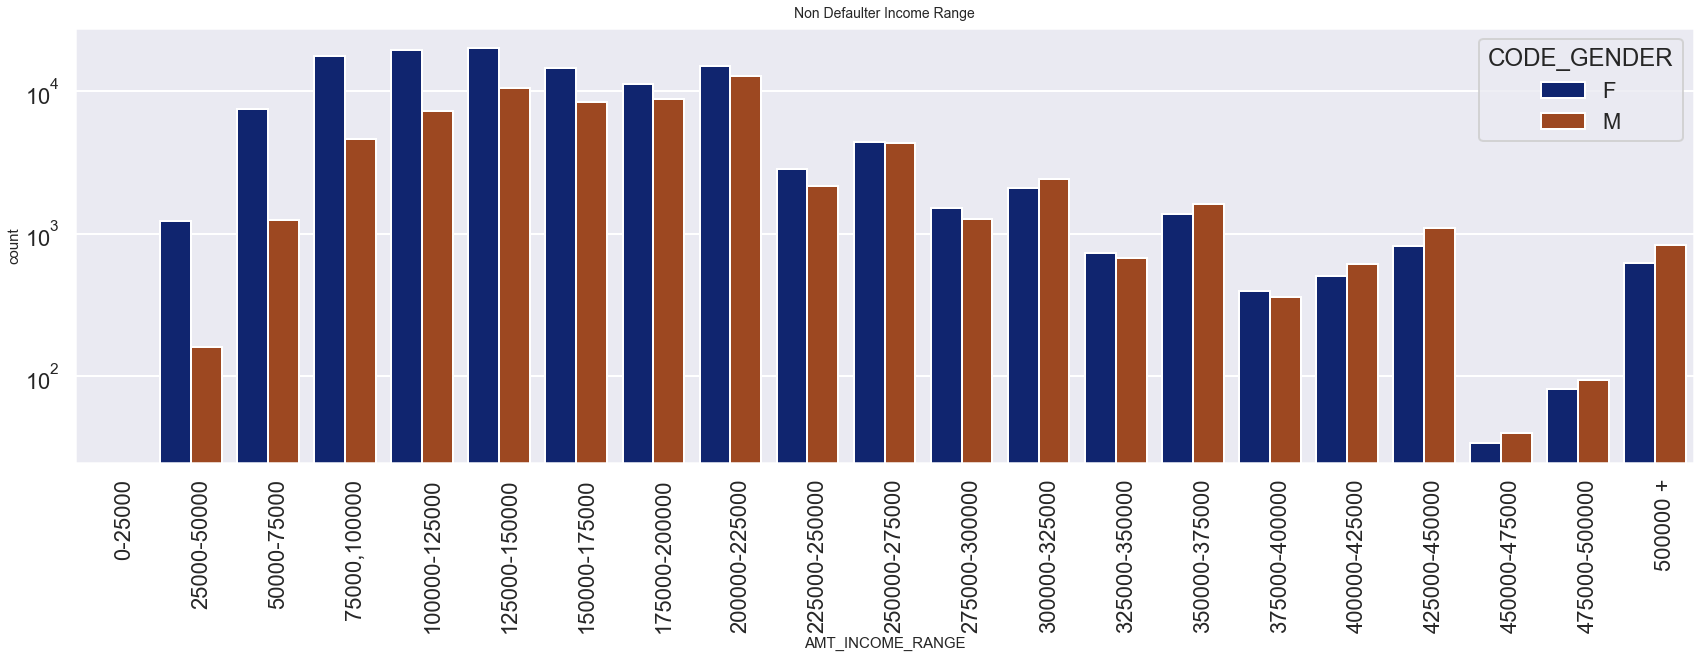

In [41]:
# Plotting for income range for Non-Defaulter
plotfunc(bank_ds_non_def,col='AMT_INCOME_RANGE',title='Non Defaulter Income Range',hue='CODE_GENDER')

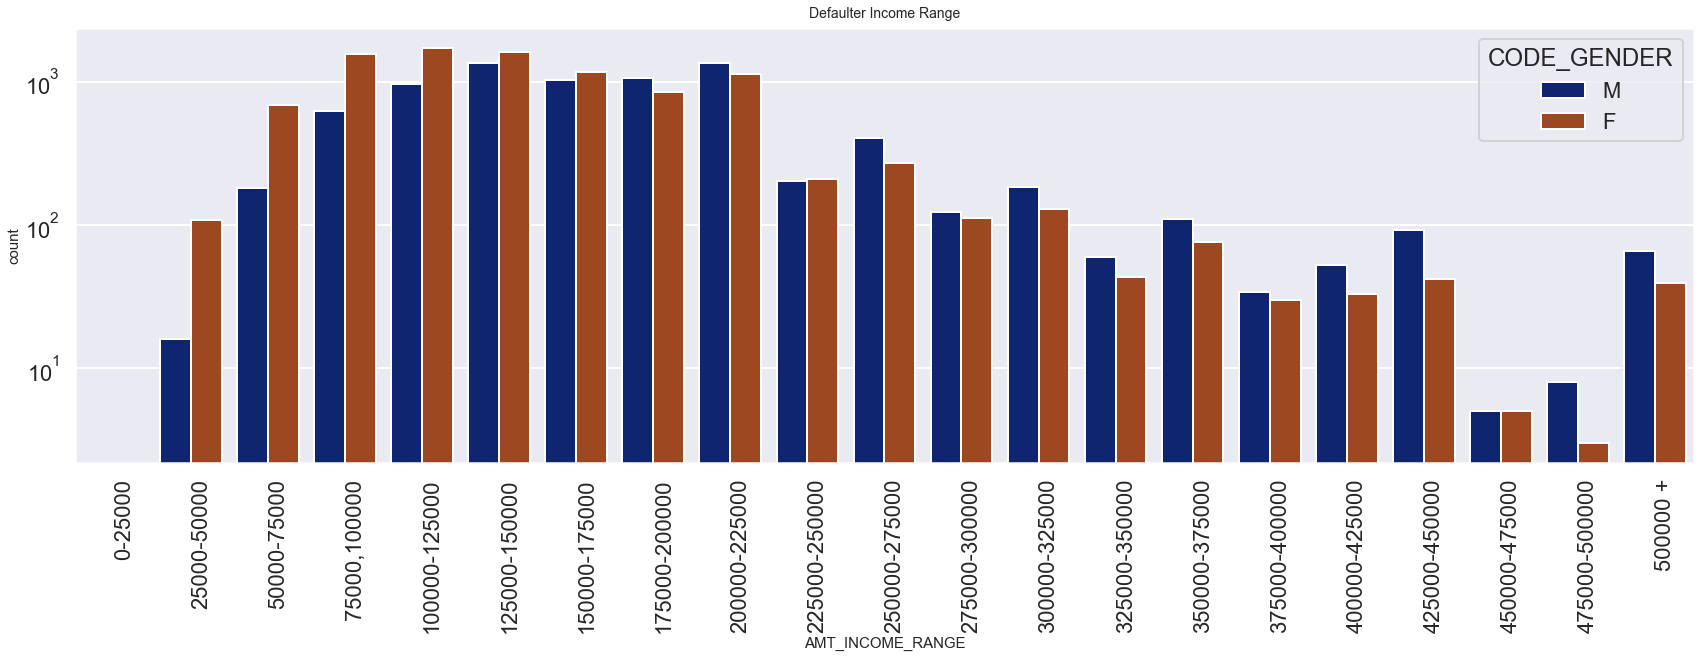

In [42]:
# Plot for income range for Defaulter
plotfunc(bank_ds_def,col='AMT_INCOME_RANGE',title='Defaulter Income Range',hue='CODE_GENDER')

our observation from above graph:
1.Female are more in count as compared to males.
2.The income range from 200000 + have more number of males than females.
3.Larger Male population have more income, whereas large number of females work at the income range from 25000 - 250000. (for both defaulters and non defaulters)

# contract type

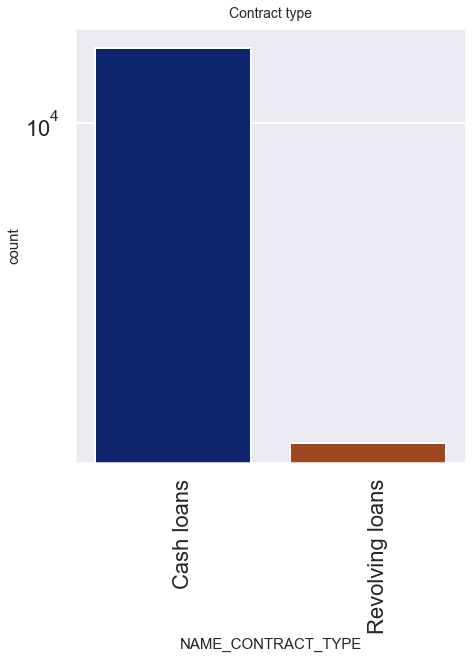

In [43]:
# Plotting for Contract type for Defaulters
plotfunc(bank_ds_def,col='NAME_CONTRACT_TYPE',title='Contract type')

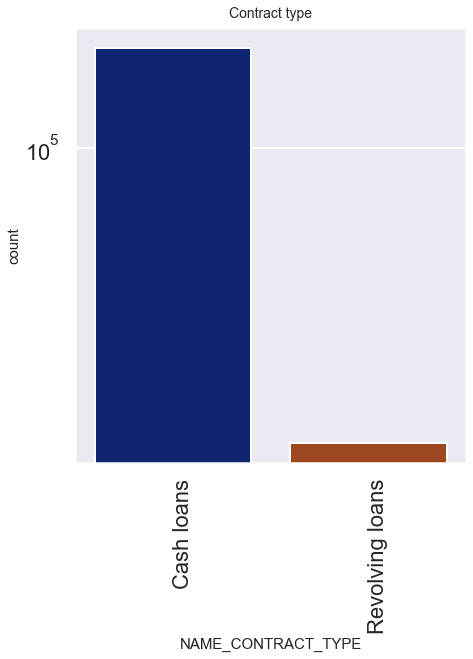

In [44]:
# Plotting for Contract type for Non Defaulters
plotfunc(bank_ds_non_def,col='NAME_CONTRACT_TYPE',title='Contract type')

We can observer the following from above presentation 
1.People choose Cash loans over revolving loan contract.
2.People are more likely to default on cash loans than revolving loan contract.

# Age vs Income

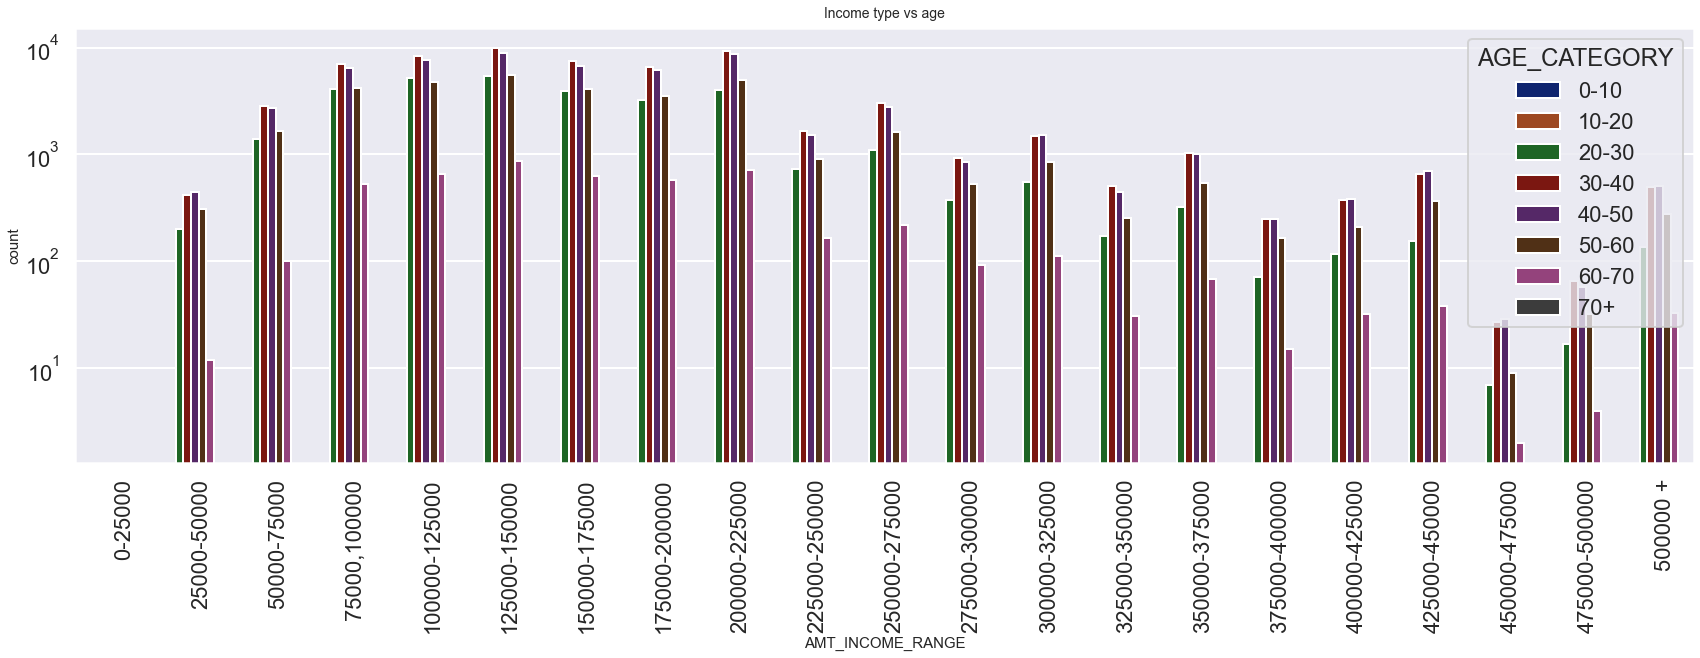

In [45]:
# Plotting for age vs income for Non Defaulters
plotfunc(bank_ds_non_def,col='AMT_INCOME_RANGE',title='Income type vs age',hue='AGE_CATEGORY')

from the above graph we can notice that there can be multiple studies that can be done on the graph. 
1.there are maximum people at the age range of 30-50, who earn between 75000-250000.
2.People of age range 20-30 are more, having earnings 75000 to 225000.
3.older people from age of 60 and above fall lowest in every income range.

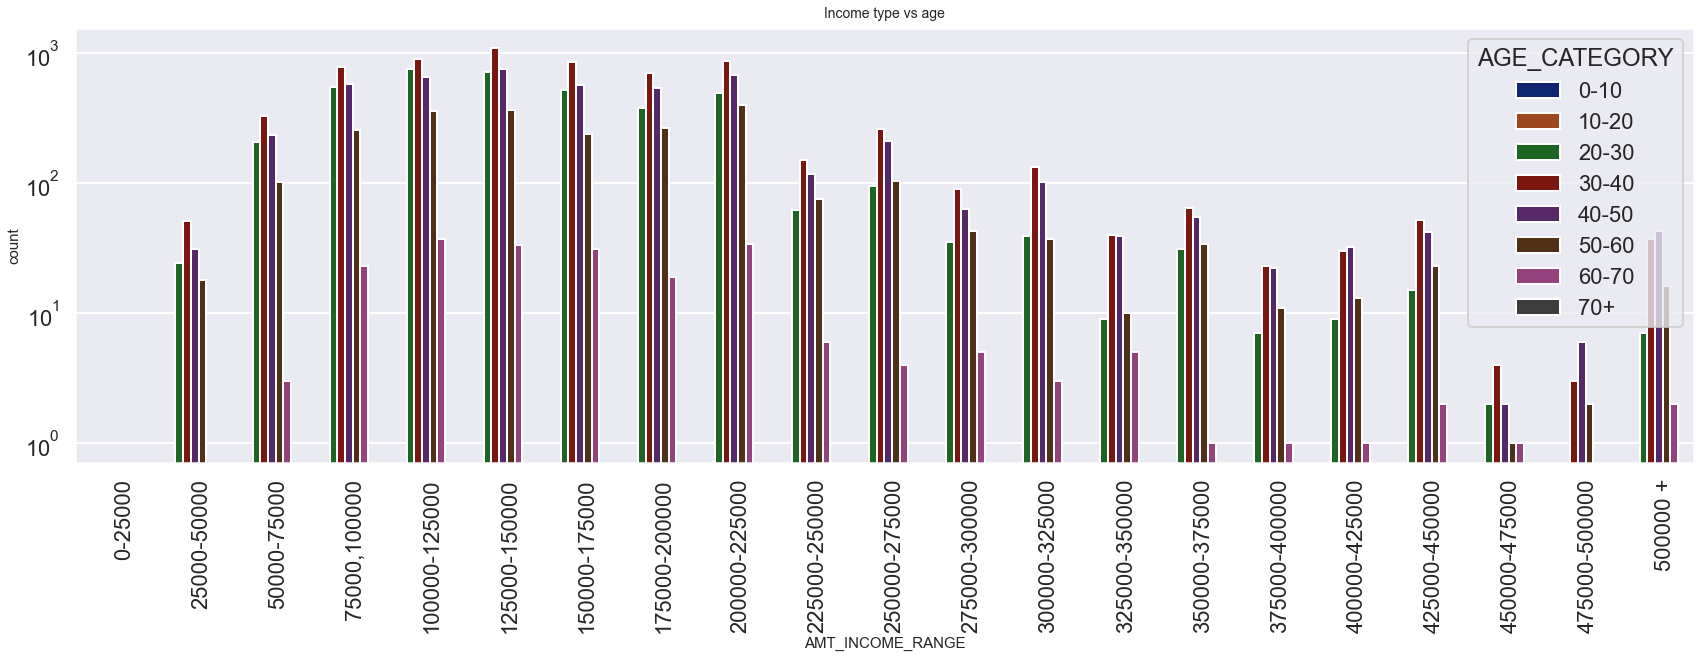

In [46]:
plotfunc(bank_ds_def,col='AMT_INCOME_RANGE',title='Income type vs age',hue='AGE_CATEGORY')

both graphs shows very similar approach in combining age and income of defaulters and non defaulters.

# Income type and Contract type

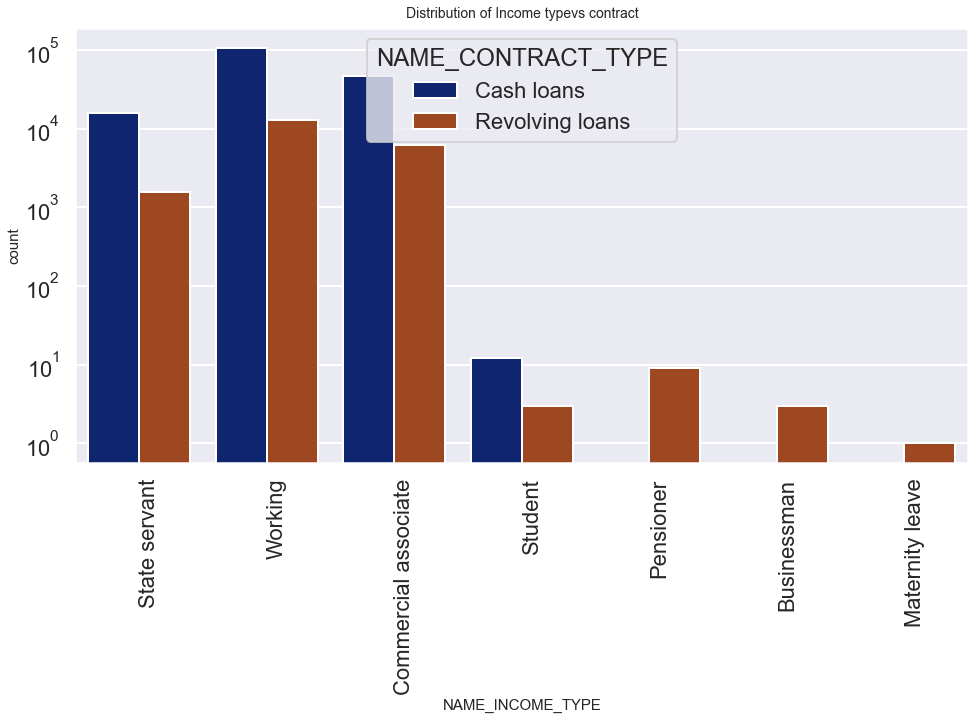

In [47]:
# Plotting for Income type and contract type relation for non defaulter.
plotfunc(bank_ds_non_def,col='NAME_INCOME_TYPE',title='Distribution of Income typevs contract',hue='NAME_CONTRACT_TYPE')

Observations:
1.State servant, Working class and commercial associates are highest to avail Cash loan contract as well as revolving Loans.
2.Students are found lowest compared to avail Cash and Revolving contract loan.
3.Pensioner and businessman do not opt for cash loan and are only indulged in revolving loans.
4.women with maternity leave only opt for revolving loan contract.

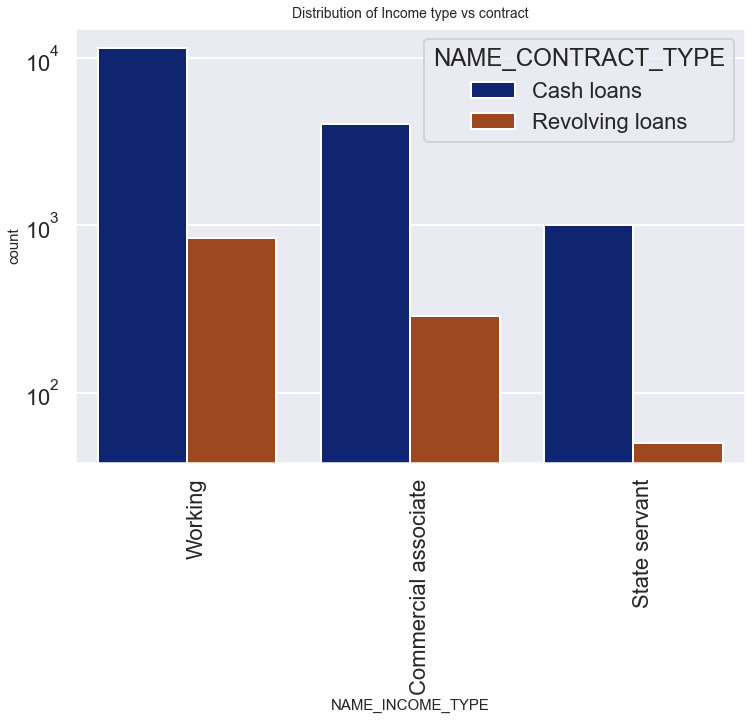

In [48]:
# Plotting for Income type and contract type relation for defaulter.
plotfunc(bank_ds_def,col='NAME_INCOME_TYPE',title='Distribution of Income type vs contract',hue='NAME_CONTRACT_TYPE')

observations:
1.Working class are highest to default on cash loans as well as revolving loans followed by commercial associates.
2.State servants are less likely to default on revolving loan, but are also lowest in defaulting on cash loans. 
4.students, pensioners ,businessmen and maternity leave people are less likely to default.

# Organisation type 

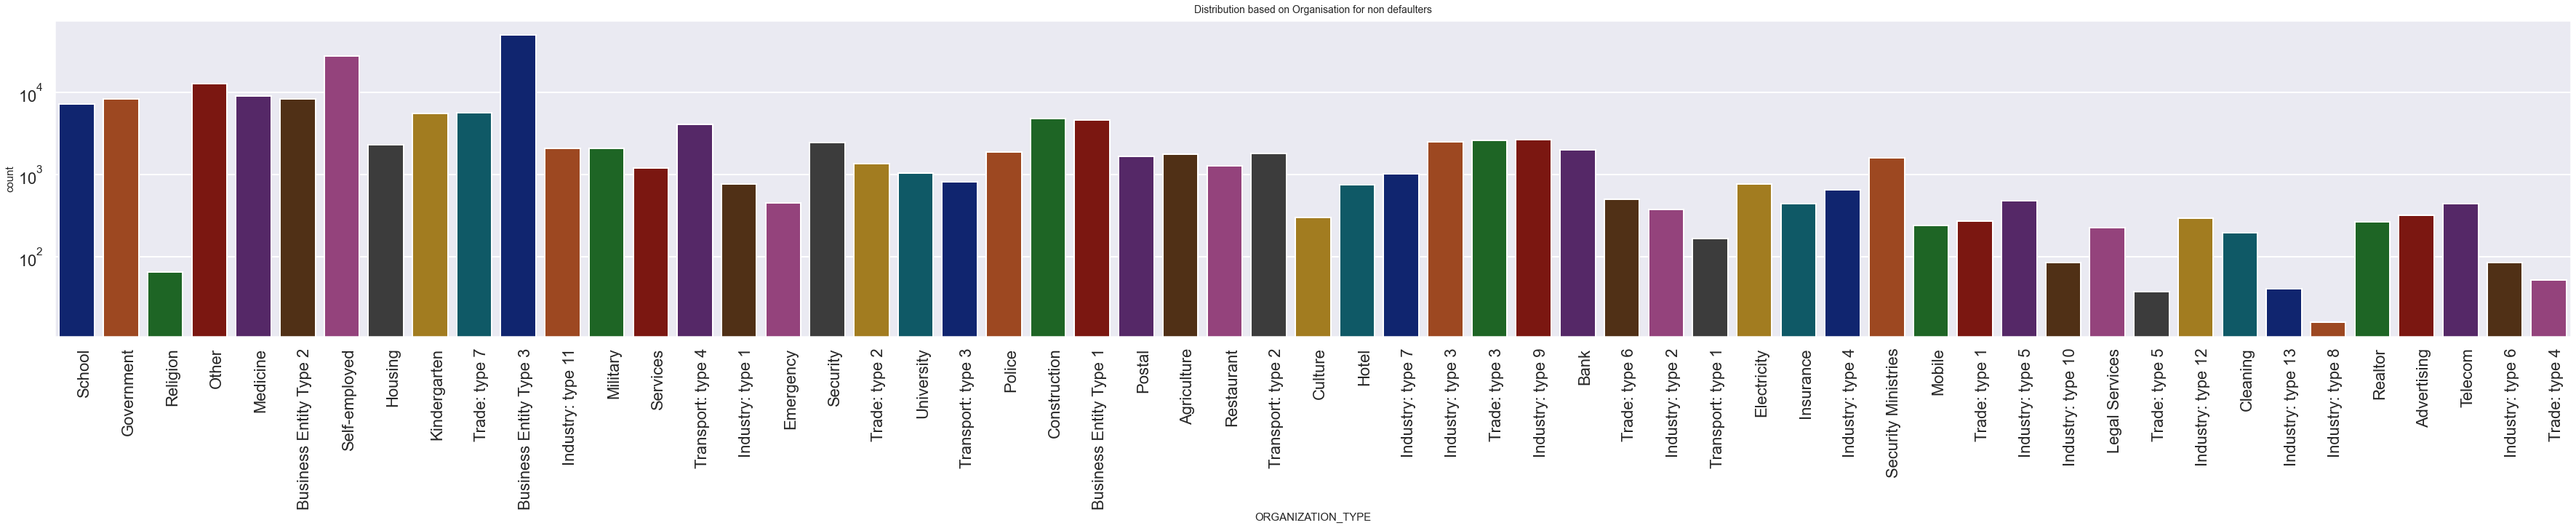

In [49]:
# Plotting for organisation type for non defaulter.
plotfunc(bank_ds_non_def,col='ORGANIZATION_TYPE',title='Distribution based on Organisation for non defaulters')

Observations
1.Business entity Type 3, Self employed, Other, Medicine and ‘Government are among highest to avail loan.
2.Industry type 8,type 6, type 10, religion and trade type 5,trade type 4 do not see more interest in availing credit.

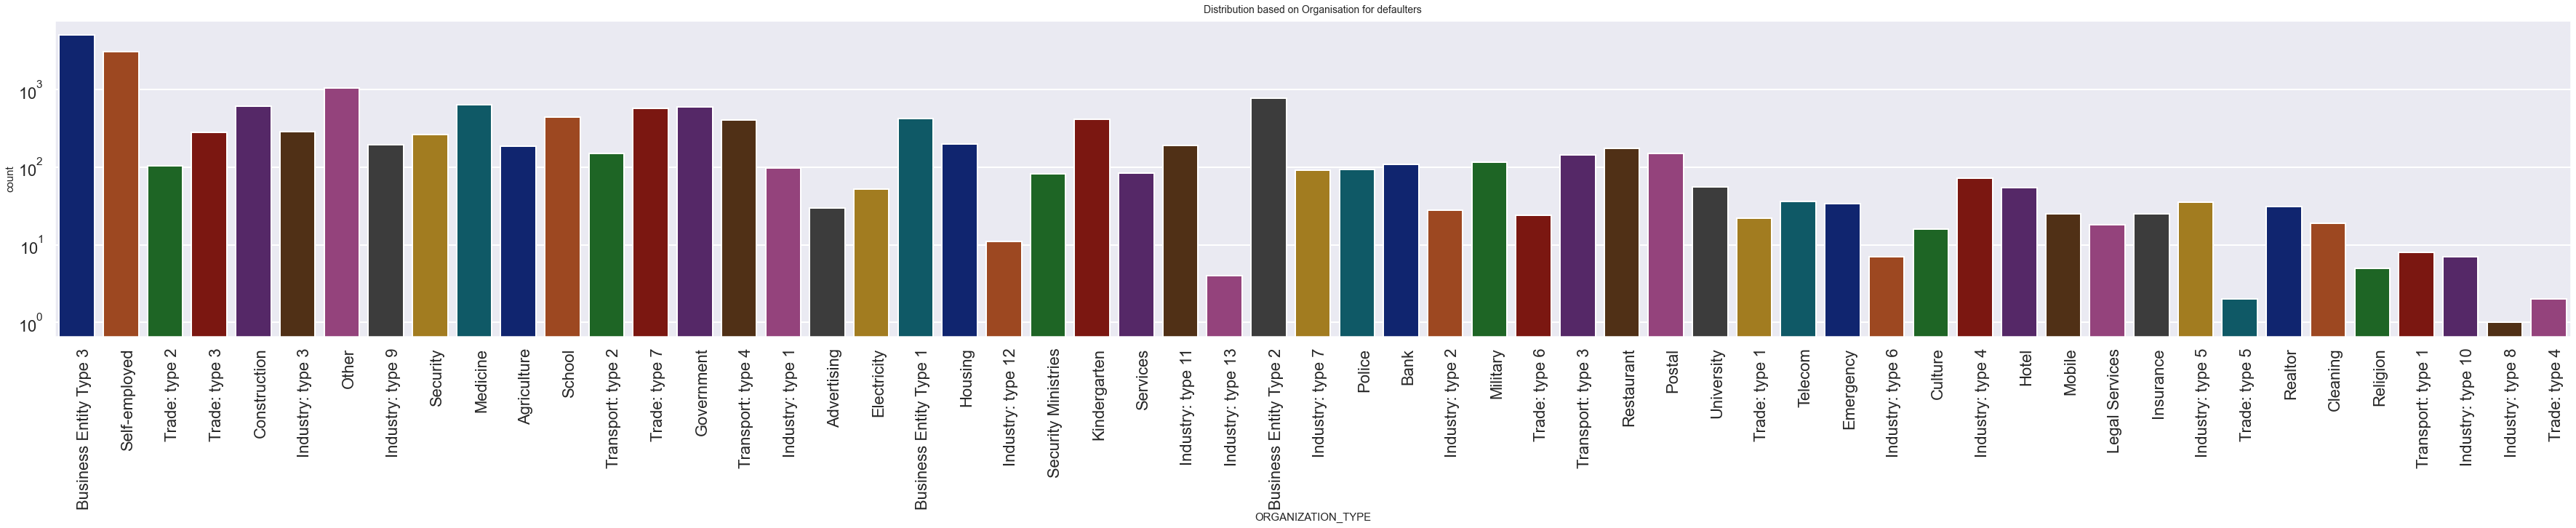

In [50]:
# Plotting for organisation type for defaulter.
plotfunc(bank_ds_def,col='ORGANIZATION_TYPE',title='Distribution based on Organisation for defaulters')

Observations:
1.business entity type 3 and self employed are highest to default.
2.industry type 13 and 8, trade type 5 and 4, religion are loewst to default.

# Gender vs Credit Range

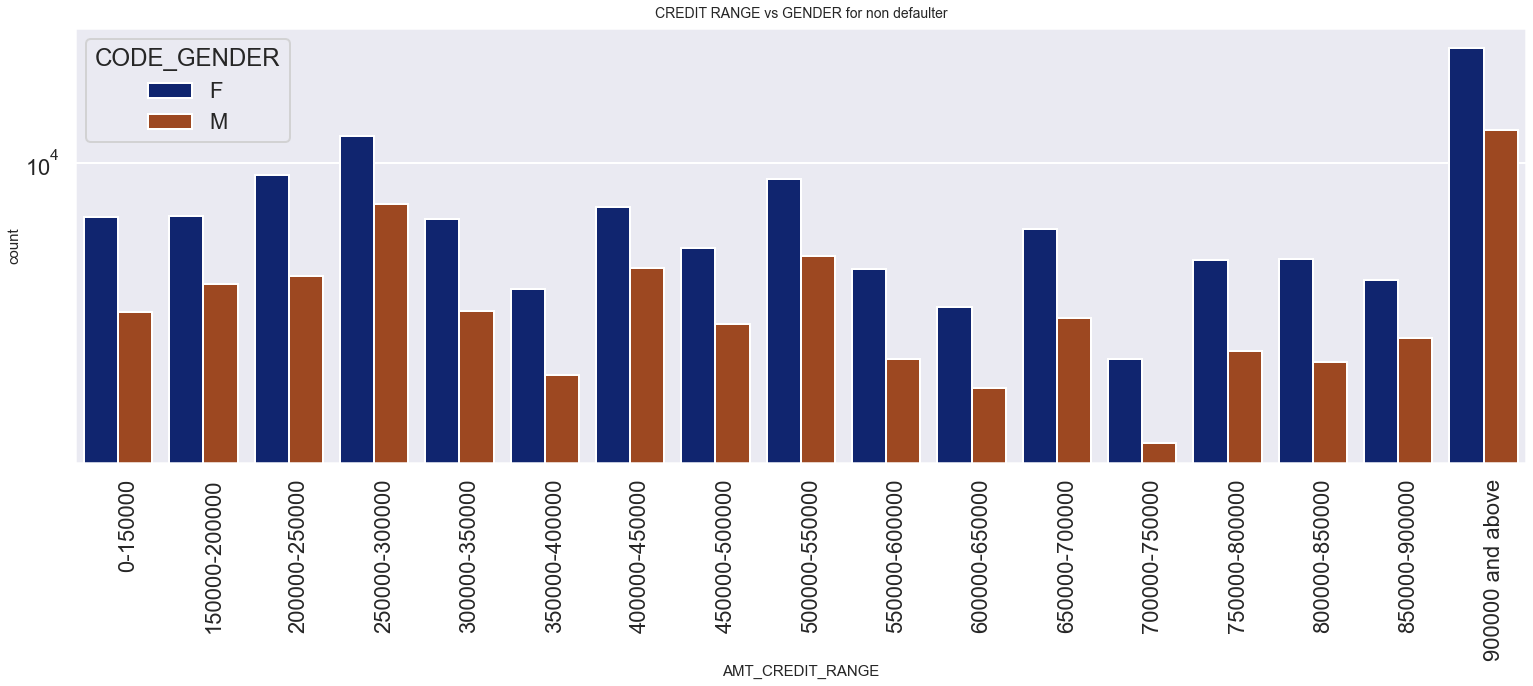

In [51]:
# gender vs credit range for non defaulter.
plotfunc(bank_ds_non_def,col='AMT_CREDIT_RANGE',title='CREDIT RANGE vs GENDER for non defaulter',hue='CODE_GENDER')

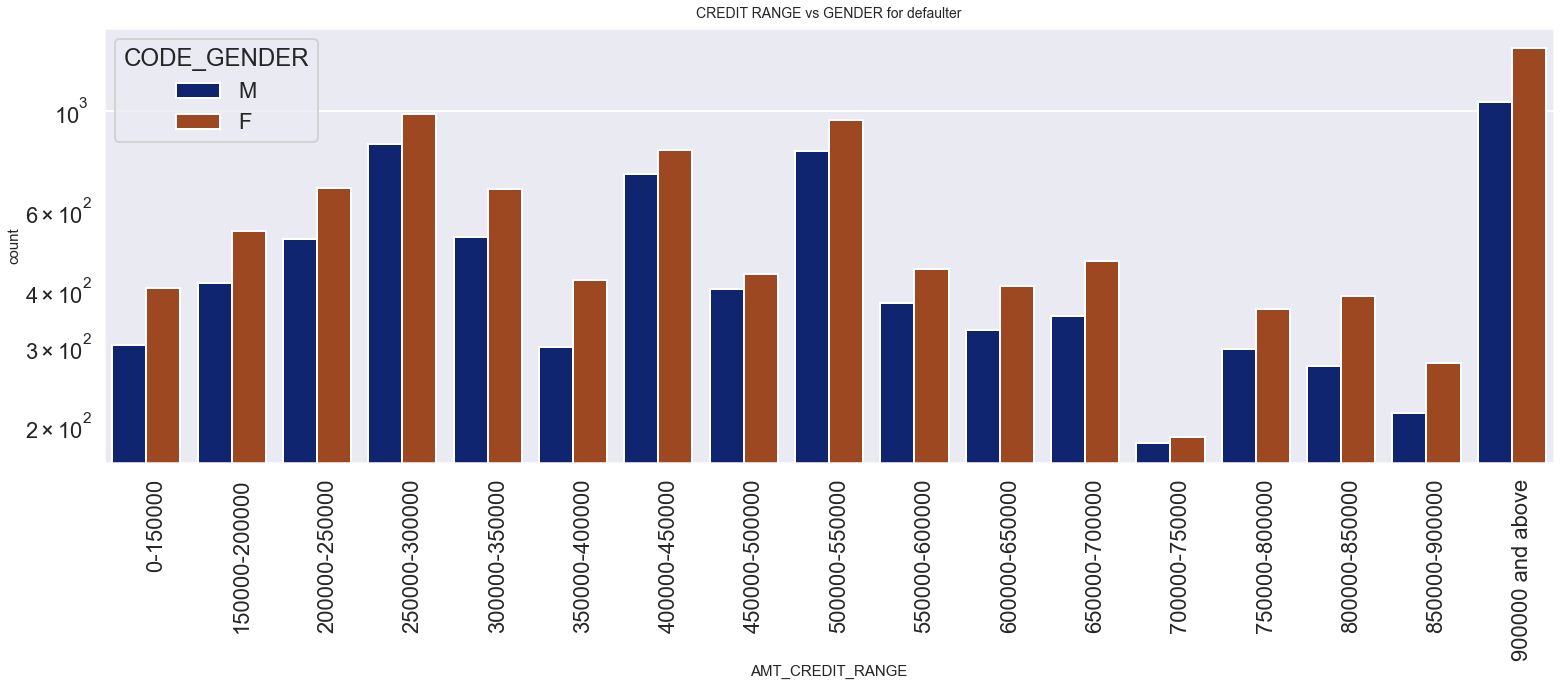

In [52]:
# gender vs credit range for defaulter.
plotfunc(bank_ds_def,col='AMT_CREDIT_RANGE',title='CREDIT RANGE vs GENDER for defaulter',hue='CODE_GENDER')

observations:
1. Females who take higher credits (900000+) are more likely to dafault than males.
2. the least credit range that male and female take is 700000-750000.

# Gender vs Age

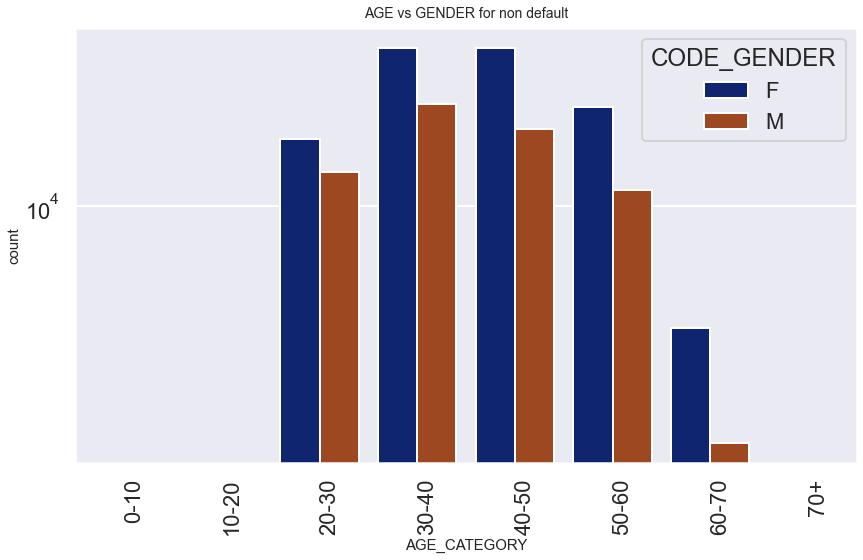

In [53]:
# gender vs AGE category for non defaulter.
plotfunc(bank_ds_non_def,col='AGE_CATEGORY',title='AGE vs GENDER for non default',hue='CODE_GENDER')

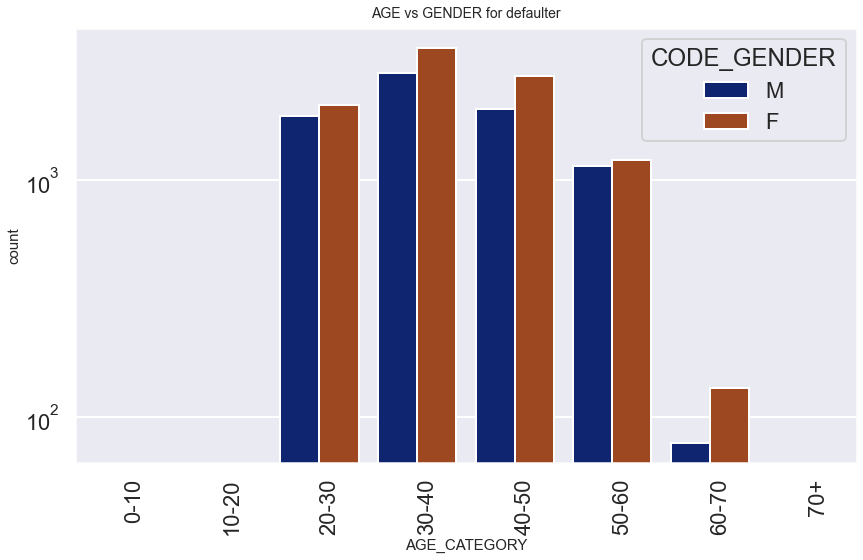

In [54]:
# gender vs AGE category for defaulter.
plotfunc(bank_ds_def,col='AGE_CATEGORY',title='AGE vs GENDER for defaulter',hue='CODE_GENDER')

observations:
1.there are more female at the age range of 30-50 who pay loans than to default.
2.males at the age on 60-70 are lowest to default and lowest to get loans too.

# Education type

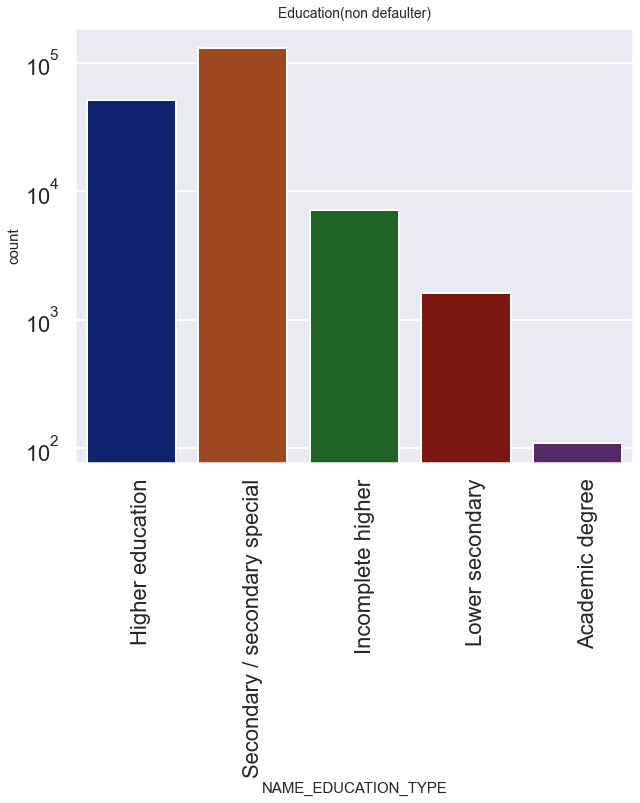

In [55]:
# education type for non defaulter.
plotfunc(bank_ds_non_def,col='NAME_EDUCATION_TYPE',title='Education(non defaulter)')

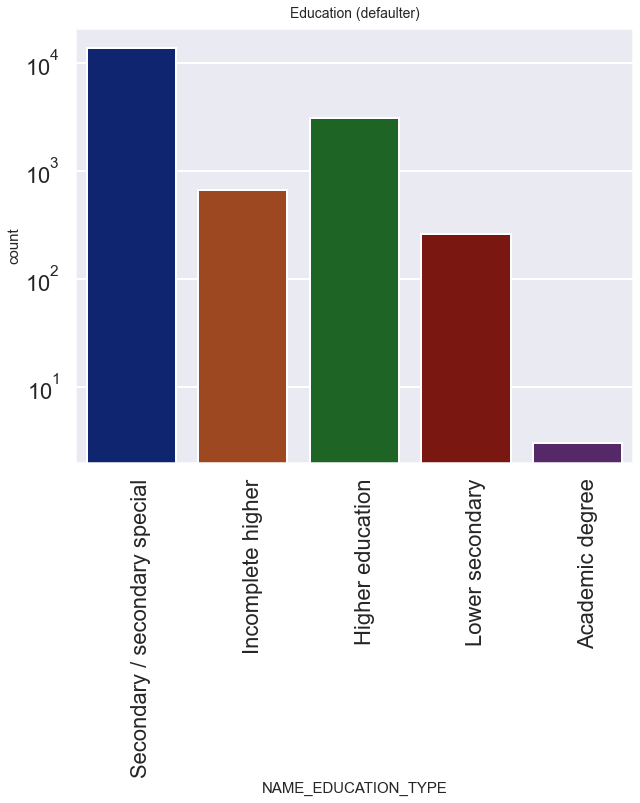

In [56]:
# Education type for defaulter.
plotfunc(bank_ds_def,col='NAME_EDUCATION_TYPE',title='Education (defaulter)')

Observations:
1.Secondary/secondary special are highest to repay the loan and highest to default too.
2.People with Acadmic degree are among the lowest to repay the loan and default.

# Education type vs Credit range

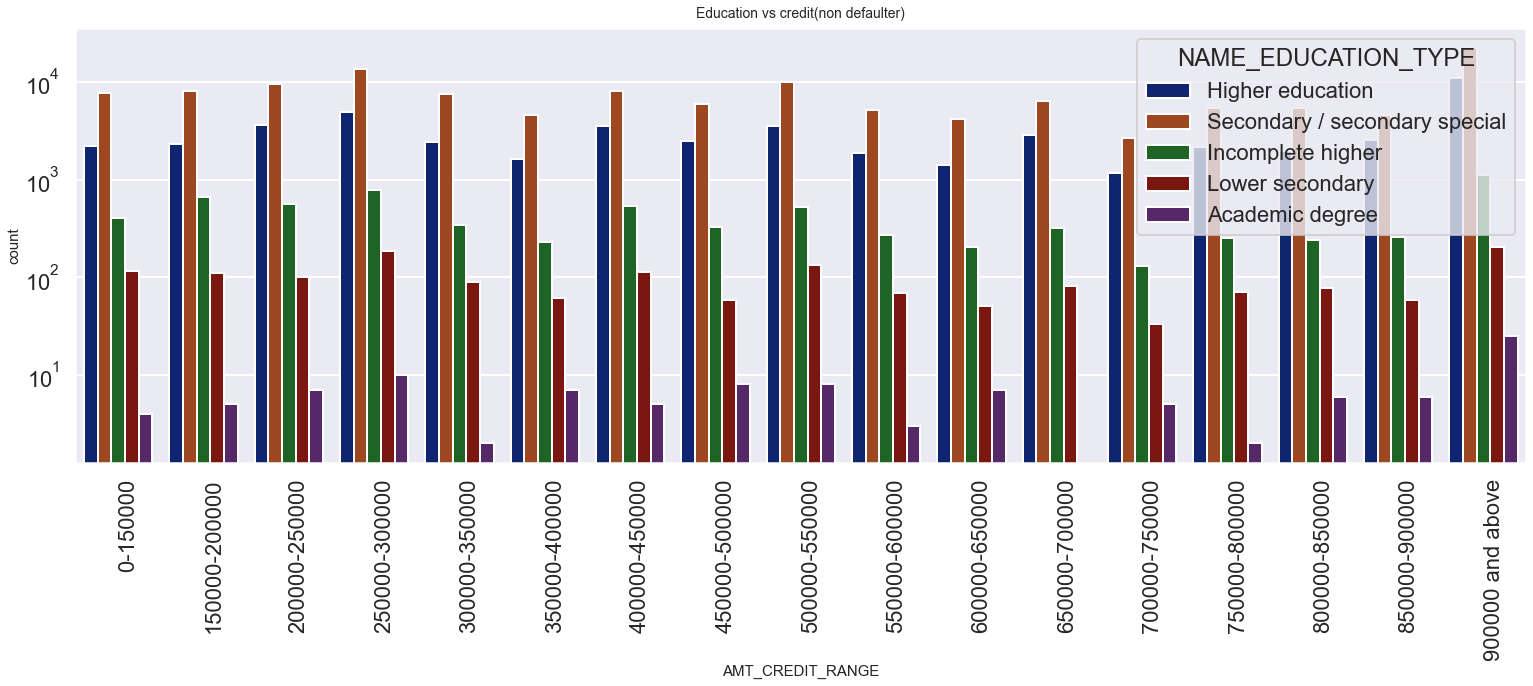

In [57]:
# Education type vs credit range for non defaulter.
plotfunc(bank_ds_non_def,col='AMT_CREDIT_RANGE',title='Education vs credit(non defaulter)',hue='NAME_EDUCATION_TYPE')

Observations:
1.people with secondary education are highest to avail credit in all the ranges.
2.people with academic degree are the least to avail the credit in all the ranges.

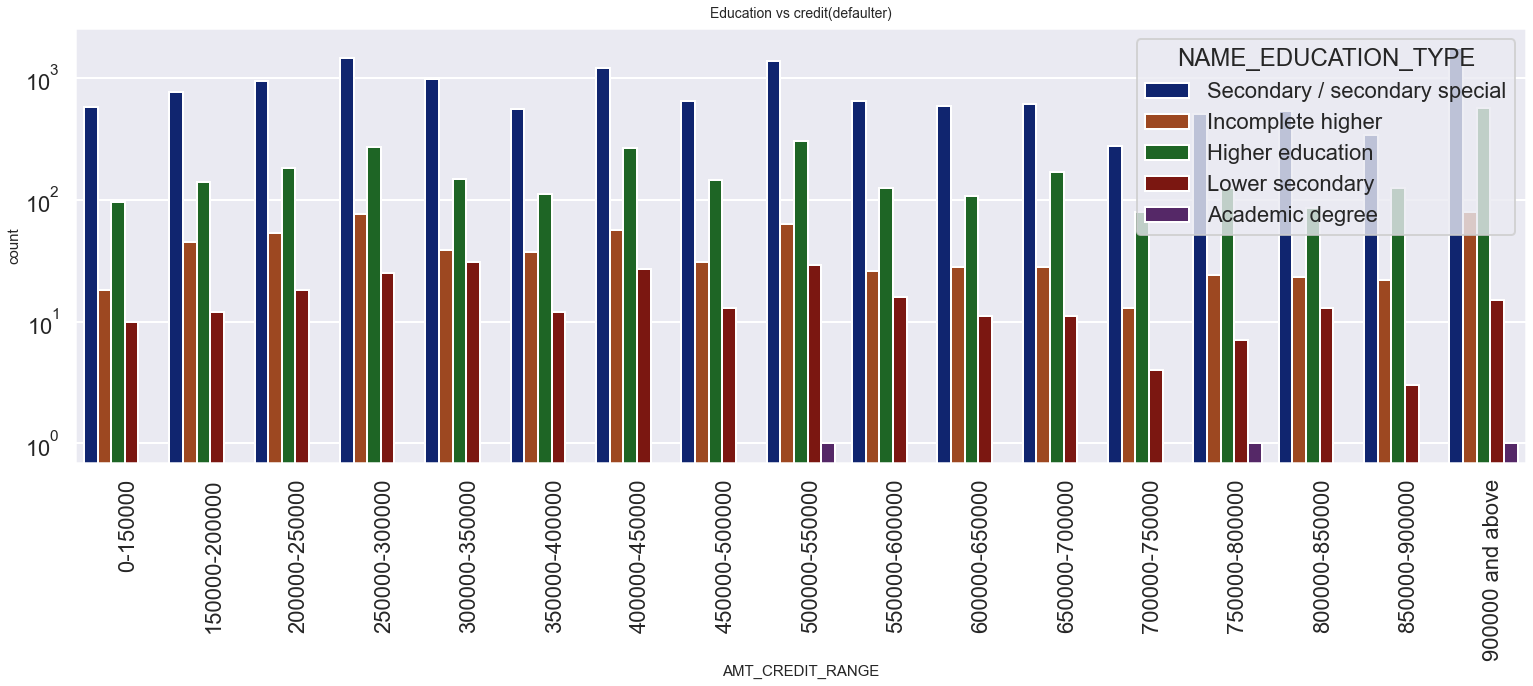

In [58]:
# Education type vs credit range for defaulter.
plotfunc(bank_ds_def,col='AMT_CREDIT_RANGE',title='Education vs credit(defaulter)',hue='NAME_EDUCATION_TYPE')

observations:
1.people with secondary education are more likely to default in all the ranges.
2.people with academic degree have only defaulted at the credit range of 500000-550000,750000-800000,900000+.
3.Academic degree people are less likely to default.


# Family status

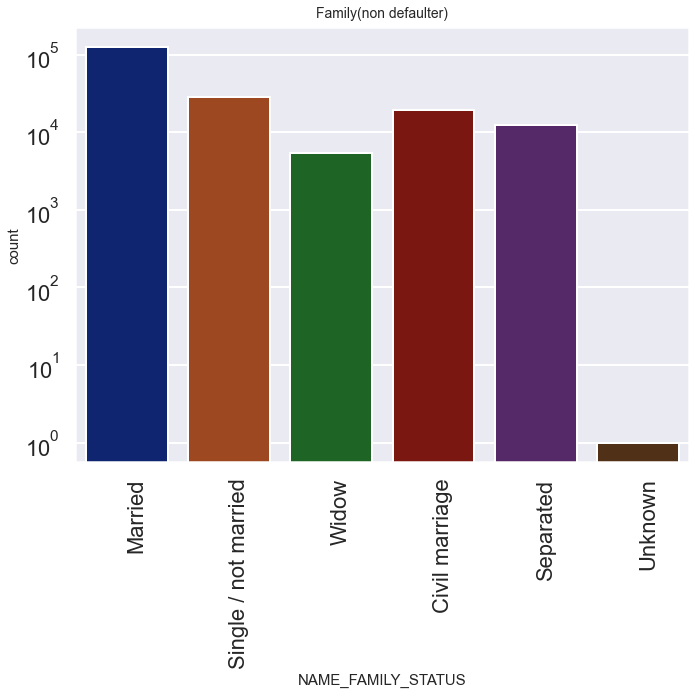

In [59]:
# Family status comparison of non defaulter.
plotfunc(bank_ds_non_def,col='NAME_FAMILY_STATUS',title='Family(non defaulter)')

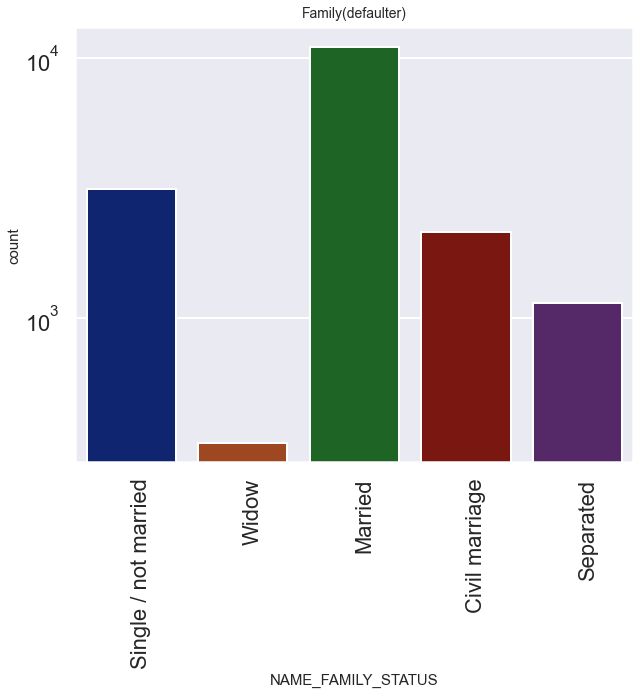

In [60]:
# Family status comparison of defaulter.
plotfunc(bank_ds_def,col='NAME_FAMILY_STATUS',title='Family(defaulter)')

observation
1.Married people are more to pay loans and also to default.
2.Family type 'others' are less to avail loans.
3.Widow are less likely to default on loans.

# Age vs Credit Range

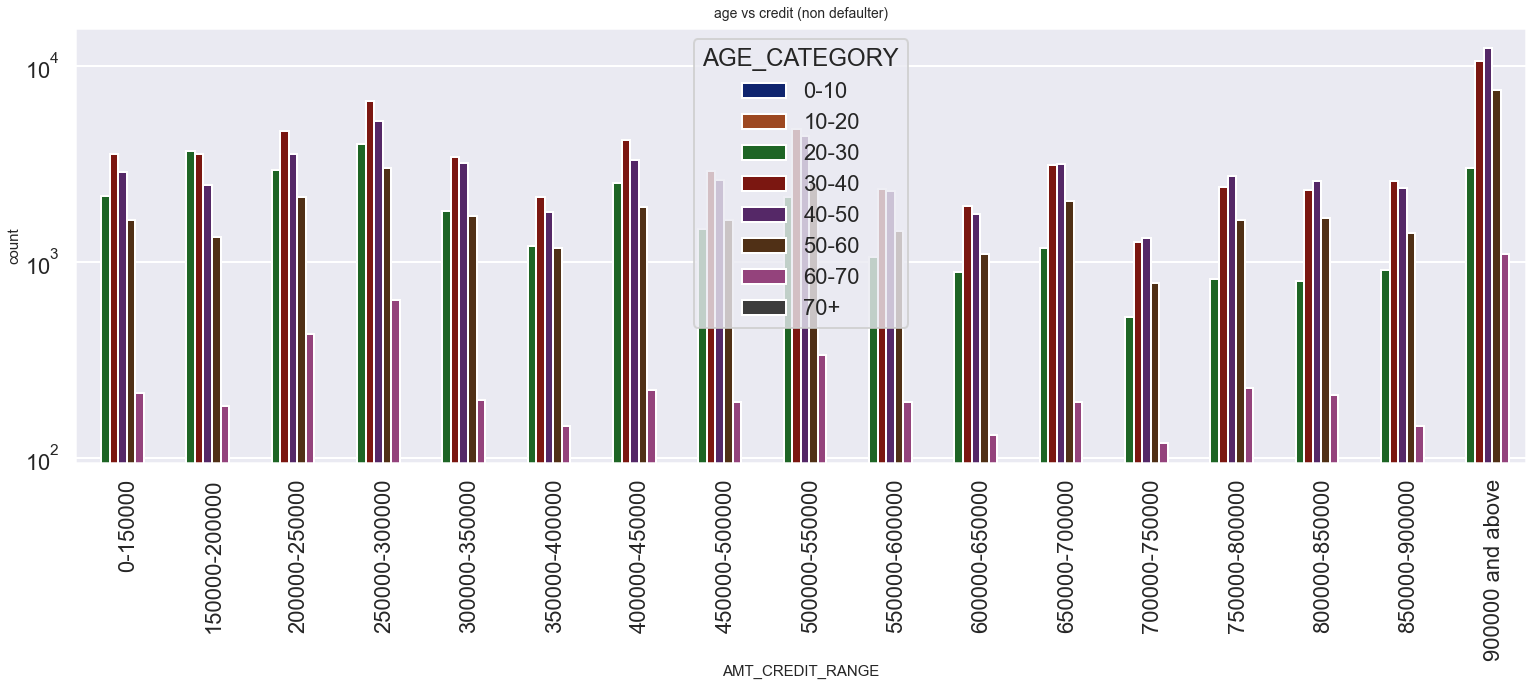

In [61]:
#comparing age vs credit range of non defaulters.
plotfunc(bank_ds_non_def,col='AMT_CREDIT_RANGE',title='age vs credit (non defaulter)',hue='AGE_CATEGORY')

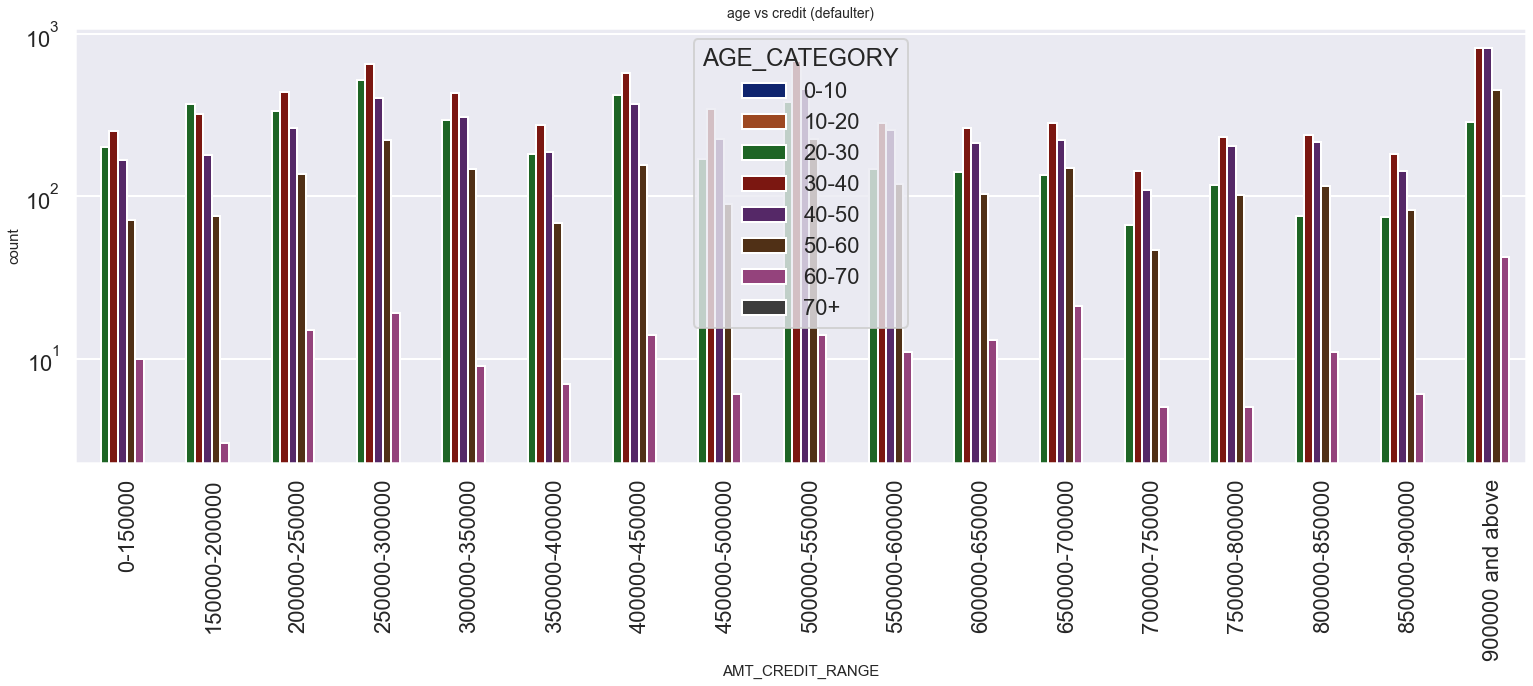

In [62]:
#comparing age vs credit range of defaulters.
plotfunc(bank_ds_def,col='AMT_CREDIT_RANGE',title='age vs credit (defaulter)',hue='AGE_CATEGORY')

Observations
people with :-
1.age group of 30-40 are more to avail lowest credit range of 0-150000.
2.age group of 30-40 and 40-50 are more likely to avail more higher credits.
3.age group of 20-30 tends to avails the maximum credit at range of 250000-300000.
4.age group of 60-70 are less to get loan but does not default.
5.age group of 70+ does not avail credit and hence does not default as well.

# Bivarient analysis for numerical variables

#### AMT_CREDIT

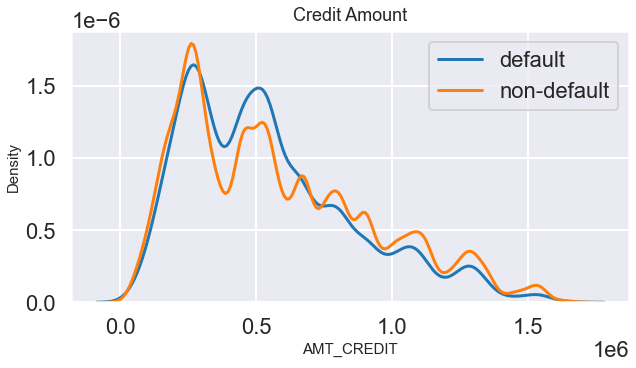

In [63]:
#plotting kde plot of 'AMT_CREDIT'
plt.figure(figsize=(10,5))
sns.kdeplot(bank_ds_def['AMT_CREDIT'], label = 'default')
sns.kdeplot(bank_ds_non_def['AMT_CREDIT'], label = 'non-default')
plt.title(r'Credit Amount')
plt.legend()
plt.show()

observation:
1.we can observe that most of the people who take higher abount of credit or loan tends to be defaulters.
2.higher the credit amount, higher chance to go default.
3.lower the credit taken lower are chances to go default on the loan.

#### DAYS_LAST_PHONE_CHANGE

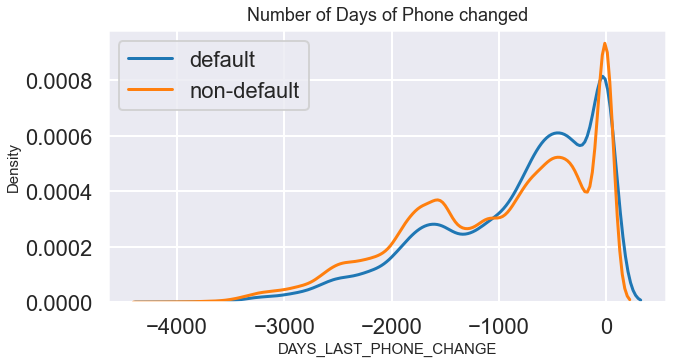

In [64]:
#kda plot of 'DAYS_LAST_PHONE_CHANGE'
plt.figure(figsize = (10,5))
sns.kdeplot(bank_ds_def['DAYS_LAST_PHONE_CHANGE'], label = 'default')
sns.kdeplot(bank_ds_non_def['DAYS_LAST_PHONE_CHANGE'], label = 'non-default')
plt.title(r'Number of Days of Phone changed')
plt.legend()
plt.show()

observaton:
1 here we can observe that person who tends to default on a loan may change his phone.
2.same pattern also is shown for non defaulters, people who rcently changed their phone number may or may not default on the credit.

#### DAYS_BIRTH

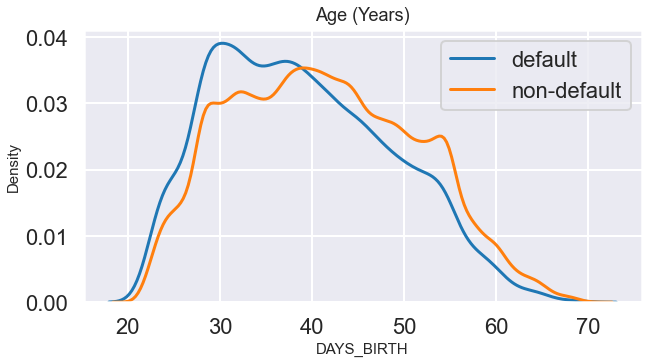

In [65]:
#kde plot of 'DAYS_BIRTH'
plt.figure(figsize = (10,5))
sns.kdeplot(bank_ds_def['DAYS_BIRTH'], label = 'default')
sns.kdeplot(bank_ds_non_def['DAYS_BIRTH'], label = 'non-default')
plt.title('Age (Years)')
plt.legend()
plt.show()

Observation:
we can see that maximum of certain group of people mostle of age 28-39 are non defaulters as well as defaulters too. 
SO we can conclude that this particular group have max defaulters and also have max non defaulteers too.

#### AMT_ANNUITY

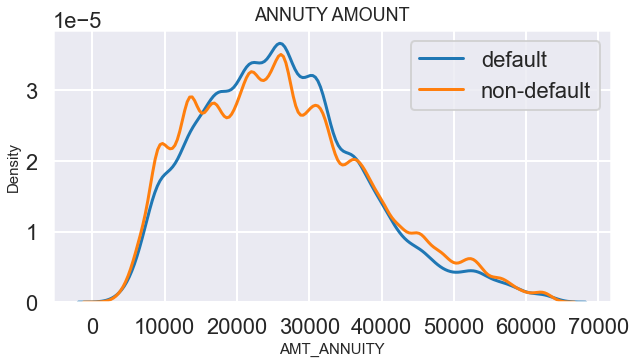

In [66]:
#kde plot of 'AMT_ANNUITY'
plt.figure(figsize = (10,5))
sns.kdeplot(bank_ds_def['AMT_ANNUITY'], label = 'default')
sns.kdeplot(bank_ds_non_def['AMT_ANNUITY'], label = 'non-default')
plt.title('ANNUTY AMOUNT')
plt.legend()
plt.show()

observaton:
Nothing can be clearly stated from this graph.
no proper comparison can be done.

#### DAYS_EMPLOYED

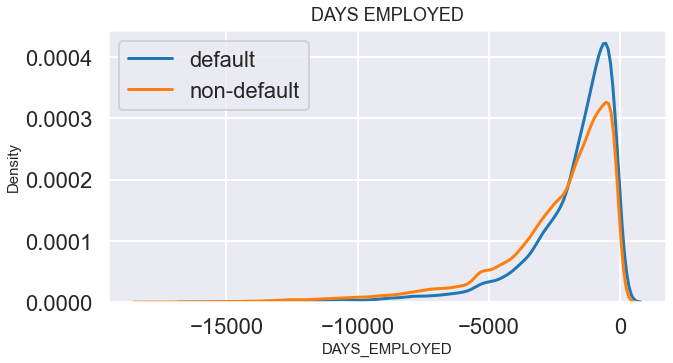

In [67]:
#kde plot of 'DAYS_EMPLOYED'
plt.figure(figsize = (10,5))
sns.kdeplot(bank_ds_def['DAYS_EMPLOYED'], label = 'default')
sns.kdeplot(bank_ds_non_def['DAYS_EMPLOYED'], label = 'non-default')
plt.title('DAYS EMPLOYED')
plt.legend()
plt.show()

observation:
people who are employed for less than 5000 days i.e 13 years have growing default rate with growing non default rate.
still the graph shows that recently employed people are more likely to default on loan.

# Bivariate Analysis

Analysing correlation for continous variable for Defaulter and non Defaulter.

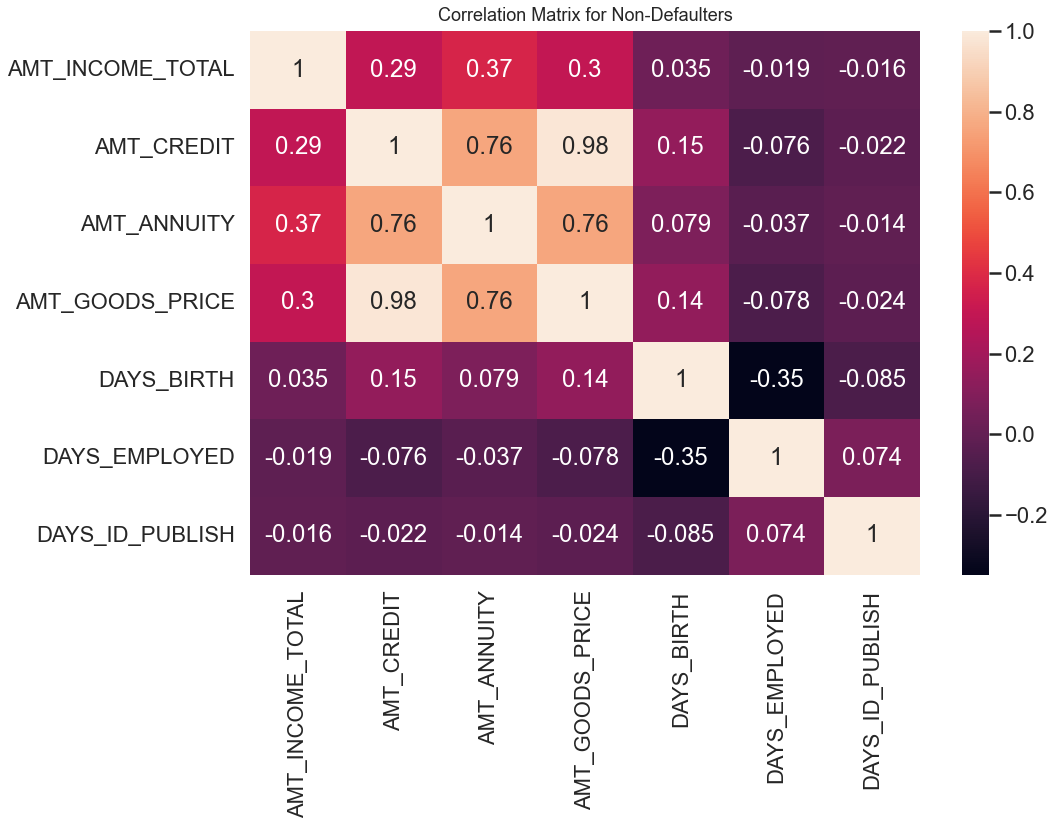

In [68]:
#Plot Correlation heatmap for Non Defaulter 
col=bank_ds_non_def[['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','DAYS_BIRTH','DAYS_EMPLOYED','DAYS_ID_PUBLISH']]
plt.figure(figsize = (15,10))
sns.heatmap(col.corr(), annot=True)
plt.title("Correlation Matrix for Non-Defaulters")
plt.show()

Observation :
we can observe that AMT_CREDIT,GOODS_PRICE & AMT_ANNUITY are highly correlated to one another.

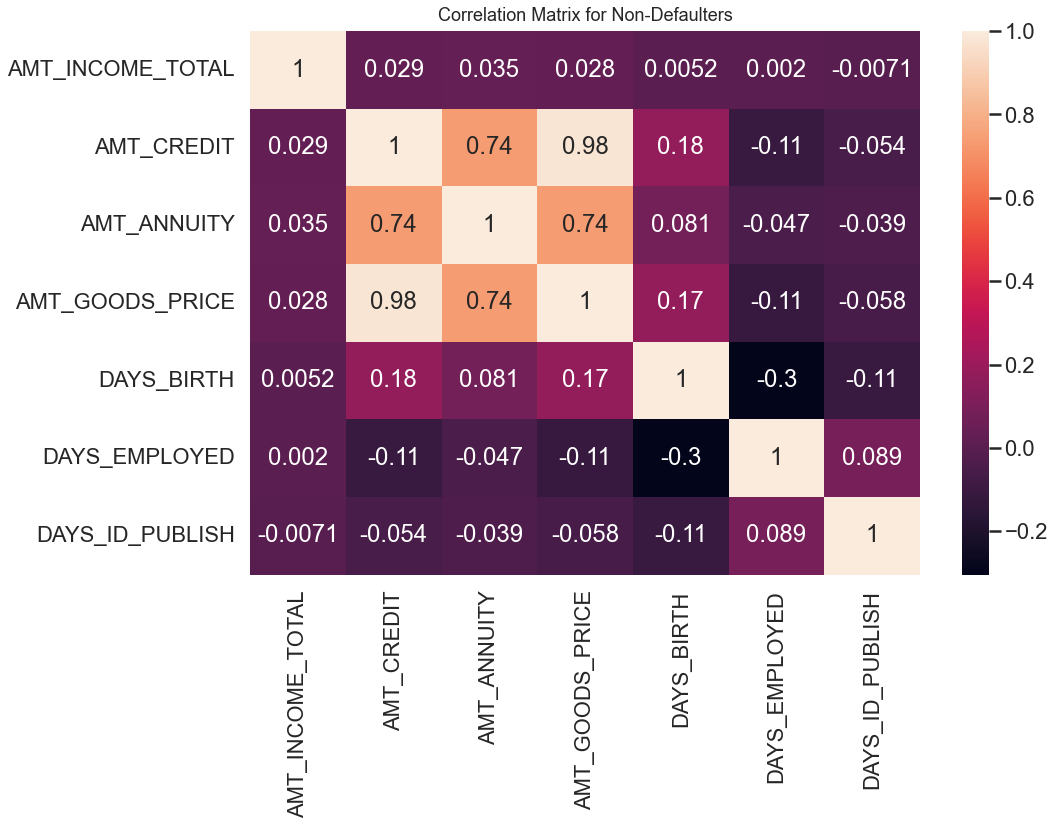

In [69]:
#Plot Correlation heatmap for Defaulter 
col=bank_ds_def[['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','DAYS_BIRTH',
                   'DAYS_EMPLOYED','DAYS_ID_PUBLISH']]
plt.figure(figsize = (15,10))
sns.heatmap(col.corr(), annot=True)
plt.title("Correlation Matrix for Non-Defaulters")
plt.show()

We have similar observations for defaulter Correlation matrix, as AMT_CREDIT,GOODS_PRICE & AMT_ANNUITY are highly correlated to one another in the above mheatmap of defaulters too.

# Sourcing The Previous application data

In [70]:
pre_app = pd.read_csv('previous_application.csv')
pre_app.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [71]:
pre_app.shape

(1670214, 37)

In [72]:
pre_app.dtypes

SK_ID_PREV                       int64
SK_ID_CURR                       int64
NAME_CONTRACT_TYPE              object
AMT_ANNUITY                    float64
AMT_APPLICATION                float64
AMT_CREDIT                     float64
AMT_DOWN_PAYMENT               float64
AMT_GOODS_PRICE                float64
WEEKDAY_APPR_PROCESS_START      object
HOUR_APPR_PROCESS_START          int64
FLAG_LAST_APPL_PER_CONTRACT     object
NFLAG_LAST_APPL_IN_DAY           int64
RATE_DOWN_PAYMENT              float64
RATE_INTEREST_PRIMARY          float64
RATE_INTEREST_PRIVILEGED       float64
NAME_CASH_LOAN_PURPOSE          object
NAME_CONTRACT_STATUS            object
DAYS_DECISION                    int64
NAME_PAYMENT_TYPE               object
CODE_REJECT_REASON              object
NAME_TYPE_SUITE                 object
NAME_CLIENT_TYPE                object
NAME_GOODS_CATEGORY             object
NAME_PORTFOLIO                  object
NAME_PRODUCT_TYPE               object
CHANNEL_TYPE             

In [73]:
#Looking for missing value percentage of each column
pre_app_1= pre_app.isnull().sum()
#displaying the null values of columns of more than 40%
pre_app_1= pre_app_1[pre_app_1.values>(0.4*len(pre_app_1))]
len(pre_app_1)


15

In [74]:
#there are 15 columns with null value data for more that 40%, which can be dropped.
pre_app_1= list(pre_app_1[pre_app_1.values>=0.4].index)
pre_app.drop(labels=pre_app_1,axis=1,inplace=True)

In [75]:
#checking the shape of dataset after deleting columns with null values more thn 40%
pre_app.shape

(1670214, 22)

#### Merging the two datasets

In [76]:
# Merging the Application dataset with previous appliaction dataset
new_application_data=pd.merge(left=Bank_ds,right=pre_app,how='inner',on='SK_ID_CURR',suffixes='_x')

In [77]:
new_application_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_,HOUR_APPR_PROCESS_START_,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_INCOME_RANGE,AGE_CATEGORY,AMT_CREDIT_RANGE,SK_ID_PREV,NAME_CONTRACT_TYPEx,AMT_APPLICATION,AMT_CREDITx,WEEKDAY_APPR_PROCESS_STARTx,HOUR_APPR_PROCESS_STARTx,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,26,-637,-3648.0,-2120,1,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0,200000-225000,20-30,400000-450000,1038818,Consumer loans,179055.0,179055.0,SATURDAY,9,Y,1,XAP,Approved,-606,XNA,XAP,New,Vehicles,POS,XNA,Stone,500,Auto technology,low_normal
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,0.003541,46,-1188,-1186.0,-291,1,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.519776,-828.0,0.0,0.0,0.0,0.0,0.0,0.0,250000-275000,40-50,900000 and above,1810518,Cash loans,900000.0,1035882.0,FRIDAY,12,Y,1,XNA,Approved,-746,XNA,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,low_normal
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,0.003541,46,-1188,-1186.0,-291,1,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.519776,-828.0,0.0,0.0,0.0,0.0,0.0,0.0,250000-275000,40-50,900000 and above,2636178,Consumer loans,337500.0,348637.5,SUNDAY,17,Y,1,XAP,Approved,-828,Cash through the bank,XAP,Refreshed,Furniture,POS,XNA,Stone,1400,Furniture,middle
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,0.003541,46,-1188,-1186.0,-291,1,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.519776,-828.0,0.0,0.0,0.0,0.0,0.0,0.0,250000-275000,40-50,900000 and above,2396755,Consumer loans,68809.5,68053.5,SATURDAY,15,Y,1,XAP,Approved,-2341,Cash through the bank,XAP,Refreshed,Consumer Electronics,POS,XNA,Country-wide,200,Consumer electronics,middle
4,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,53,-225,-4260.0,-2531,1,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,-815.0,0.0,0.0,0.0,0.0,0.0,0.0,50000-75000,50-60,0-150000,1564014,Consumer loans,24282.0,20106.0,FRIDAY,5,Y,1,XAP,Approved,-815,Cash through the bank,XAP,New,Mobile,POS,XNA,Regional / Local,30,Connectivity,middle


In [78]:
#Rename the column names after merging
new_application_data = new_application_data.rename({'NAME_CONTRACT_TYPE_' : 'NAME_CONTRACT_TYPE','AMT_CREDIT_':'AMT_CREDIT','AMT_ANNUITY_':'AMT_ANNUITY',
                         'WEEKDAY_APPR_PROCESS_START_' : 'WEEKDAY_APPR_PROCESS_START',
                         'HOUR_APPR_PROCESS_START_':'HOUR_APPR_PROCESS_START','NAME_CONTRACT_TYPEx':'NAME_CONTRACT_TYPE_PREV',
                         'AMT_CREDITx':'AMT_CREDIT_PREV','AMT_ANNUITYx':'AMT_ANNUITY_PREV',
                         'WEEKDAY_APPR_PROCESS_STARTx':'WEEKDAY_APPR_PROCESS_START_PREV',
                         'HOUR_APPR_PROCESS_STARTx':'HOUR_APPR_PROCESS_START_PREV'}, axis=1)
new_application_data.shape

(973916, 67)

In [79]:
new_application_data.isnull().sum()

SK_ID_CURR                              0
TARGET                                  0
NAME_CONTRACT_TYPE                      0
CODE_GENDER                             0
FLAG_OWN_CAR                            0
FLAG_OWN_REALTY                         0
CNT_CHILDREN                            0
AMT_INCOME_TOTAL                        0
AMT_CREDIT                              0
AMT_ANNUITY                            86
AMT_GOODS_PRICE                       936
NAME_INCOME_TYPE                        0
NAME_EDUCATION_TYPE                     0
NAME_FAMILY_STATUS                      0
NAME_HOUSING_TYPE                       0
REGION_POPULATION_RELATIVE              0
DAYS_BIRTH                              0
DAYS_EMPLOYED                           0
DAYS_REGISTRATION                       0
DAYS_ID_PUBLISH                         0
FLAG_MOBIL                              0
OCCUPATION_TYPE                    157134
CNT_FAM_MEMBERS                         0
REGION_RATING_CLIENT              

In [80]:
# Removing unwanted columns for analysis
new_application_data.drop(['SK_ID_CURR','WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START','REG_REGION_NOT_LIVE_REGION', 
              'REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
              'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY','WEEKDAY_APPR_PROCESS_START_PREV',
              'HOUR_APPR_PROCESS_START_PREV', 'FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY'],axis=1,inplace=True)

In [81]:
new_application_data.shape

(973916, 54)

## Univariate analysis

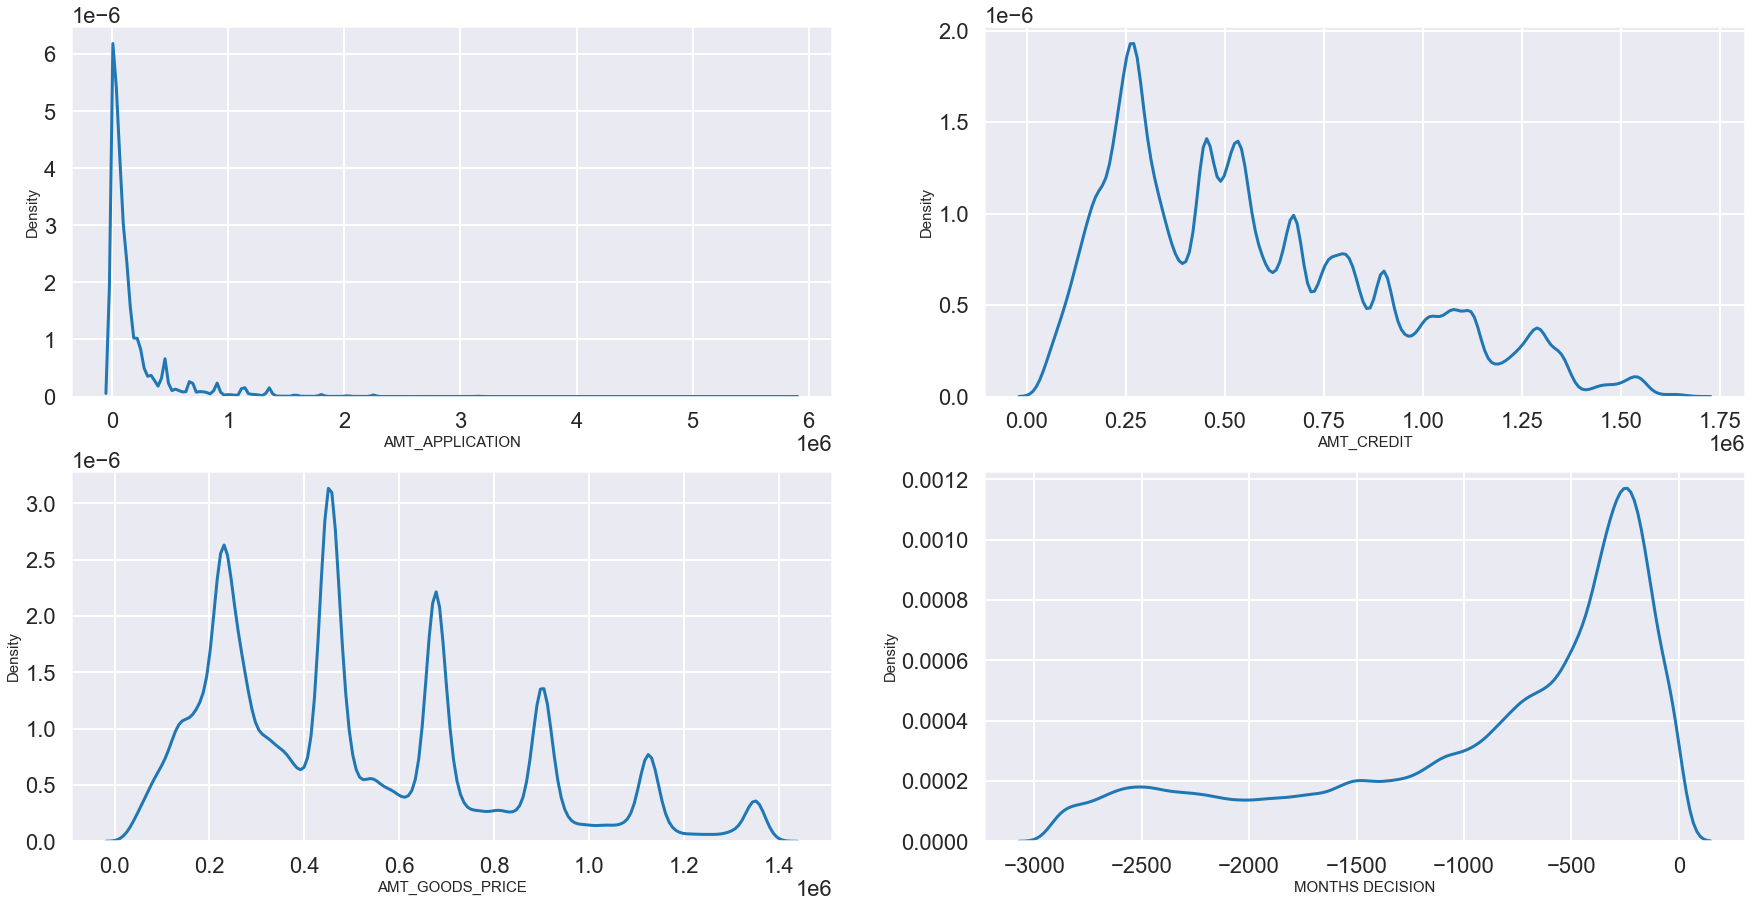

In [82]:
#plotting kde plot for categorical columns
columns_0 = ['AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'DAYS_DECISION']
plt.figure(figsize = (30,15))
i = 1
for col in columns_0:
    plt.subplot(2,2,i)
    if col == 'DAYS_DECISION':
        ax = sns.kdeplot(new_application_data[col], label = 'MONTHS DECISION')
        ax.set(xlabel = 'MONTHS DECISION')
    else:
        ax = sns.kdeplot(new_application_data[col])
        ax.set(xlabel = col)
    i += 1
plt.show()

Observations
1.we can see that AMT_GOODS_PRICE & AMT_CREDIT shows strong similar pattern, which means that credit amount was extensively used to buy goods. 
2.time taken to process the loan amound varies between approximate of 2 months to 30 months.

## Bivariate analysis

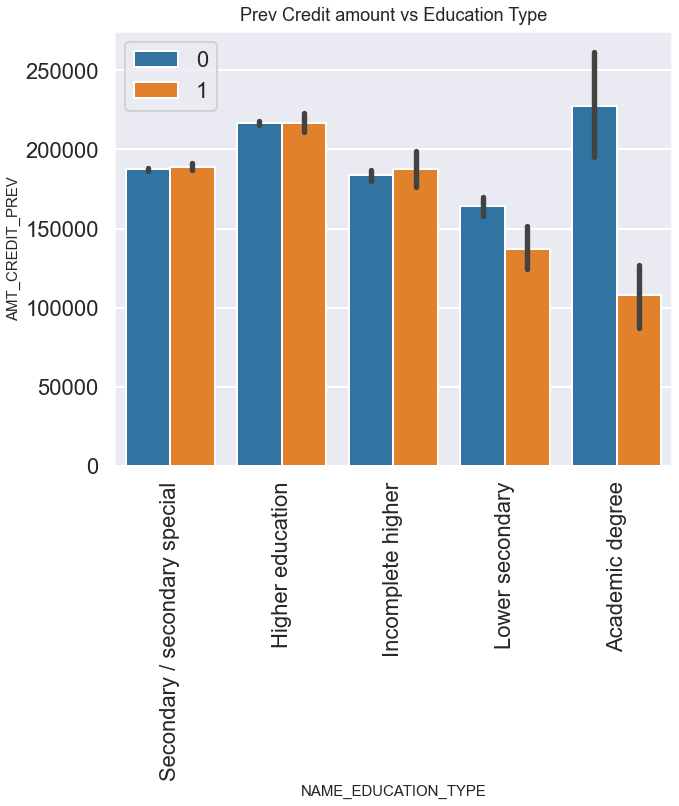

In [83]:
# Box plot for Credit amount prev vs Education Type in logarithmic scale
plt.figure(figsize=(10,8))
plt.xticks(rotation=90)
sns.barplot(data =new_application_data, y='AMT_CREDIT_PREV',hue='TARGET',x='NAME_EDUCATION_TYPE')
plt.legend()
plt.title('Prev Credit amount vs Education Type')
plt.show()

observations:
1.Here we can observe that people with acadmic degree are more likely to pay the credit and less likely to default on the credit.
2.People with higher education are more likely to default than others, so bank should focus less on higher education category candidates and more on candidates who have acadmic degree.
\n 3.women tend to use more credit and hence they are more likely to default as well as more likely to not default.